In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data set
house = pd.read_csv("train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# check data set columns info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# check SalePrice discription
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
# Check data set shape
house.shape

(1460, 81)

### Checking Missing Values

In [6]:
# find columns with missing data
columns_with_missing_data =house.columns[house.isnull().any()]
columns_with_missing_data

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Calculate the percentage of missing data for each column
columns_with_missing_data=house[columns_with_missing_data].isnull().mean() * 100

In [8]:
#find column missing values > 80%
high_missing_value=columns_with_missing_data[columns_with_missing_data > 80]

In [9]:
high_missing_value.shape

(4,)

In [10]:
high_missing_value

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [11]:
# Drop columns >= 80% of missing values
house = house.drop(high_missing_value.index, axis=1)

In [12]:
# Drop unimportant column
house = house.drop('Id', axis=1)

In [13]:
house.shape

(1460, 76)

In [14]:
#Check columns data type
house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [15]:
#check Missing values of columns
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#categorize the columns to categorical and numerical
num_cols=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

cat_cols=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','OverallQual','OverallCond']

In [17]:
# calculate missing value percentage for each column
missing_percentage =(100 * house.isnull().mean()).round(2)

In [18]:
columns_with_missing_values = missing_percentage[missing_percentage > 0].index

In [19]:
def calculate_missing_percentage(data):
    # Calculate the total number of rows in the dataset
    total_rows = data.shape[0]
    col_list = []
    # Calculate the missing value count and percentage for each column
    missing_data = data.isnull().sum()
    missing_percentage = (missing_data / total_rows) * 100

    # Iterate over each column and print the column name and percentage if percentage is greater than 0
    for column, percentage in missing_percentage.iteritems():
        if percentage > 0:
            col_list.append(column) 
            print(f"Column '{column}' has missing value percentage: {percentage:.2f}%")
    return col_list


col_list=calculate_missing_percentage(house[num_cols])

Column 'LotFrontage' has missing value percentage: 17.74%
Column 'MasVnrArea' has missing value percentage: 0.55%
Column 'GarageYrBlt' has missing value percentage: 5.55%


In [20]:
col_list

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
# Calculate the mean for each column
mean_values = house[col_list].mean()
mean_values

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [22]:
# Replace missing data with the mean value for each column
house[col_list] = house[col_list].fillna(mean_values)

In [23]:
col_list=calculate_missing_percentage(house[cat_cols])

Column 'MasVnrType' has missing value percentage: 0.55%
Column 'BsmtQual' has missing value percentage: 2.53%
Column 'BsmtCond' has missing value percentage: 2.53%
Column 'BsmtExposure' has missing value percentage: 2.60%
Column 'BsmtFinType1' has missing value percentage: 2.53%
Column 'BsmtFinType2' has missing value percentage: 2.60%
Column 'Electrical' has missing value percentage: 0.07%
Column 'FireplaceQu' has missing value percentage: 47.26%
Column 'GarageType' has missing value percentage: 5.55%
Column 'GarageFinish' has missing value percentage: 5.55%
Column 'GarageQual' has missing value percentage: 5.55%
Column 'GarageCond' has missing value percentage: 5.55%


In [24]:
col_list

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [25]:
# Fill the missing data for colums in col_list with prefix no_ and column name
for col in col_list:
    house[col] = house[col].fillna('no_' + house[col].astype(str))

In [26]:
col_list=calculate_missing_percentage(house[cat_cols])

Convert MSSubClass dtype to object

In [27]:
# convert categorical columns to string
house[cat_cols] = house[cat_cols].astype(str)

In [28]:
MSSubClass_dict = {
    20 : '1_STORYNEW',
    30 : '1_STORYOLD',
    40 : '1_STORY_WF_ATTC',
    45 : '1_H_STORYUNF',
    50 : '1_H_STORYFIN',
    60 : '2_STORYNEW',
    70 : '2_STORYOLD',
    75 : '2_H_STORY',
    80 : 'SPLIT_OR_MULTI',
    85 : 'SPLIT_FOYER',
    90 : 'DUPLEX',
    120 : '1_STORYPUD',
    150 : '1_H_STORYPUD',
    160 : '2_STORYPUD',
    180 : 'PUD_MULTILEVEL',
    190 : '2_FAM_CONV'
}

In [29]:
# Replace MSSubClass vlues by balues in the dictionary
house = house.replace({"MSSubClass": MSSubClass_dict })

In [30]:
Overall_dict = {
    1 : 'V_Poor',
    2 : 'Poor',
    3 : 'Fair',
    4 : 'Below_Avg',
    5 : 'Avg',
    6 : 'Above_Avg',
    7 : 'Good',
    8 : 'V_Good',
    9 : 'Exc',
    10 : 'V_Exc'
}

In [31]:
# Replace OverallQual and  OverallCond vlues by balues in the dictionary

house = house.replace({"OverallQual": Overall_dict })
house = house.replace({"OverallCond": Overall_dict })

## Visualising the Data

### Univariate Analysis

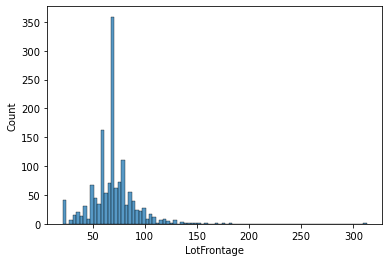

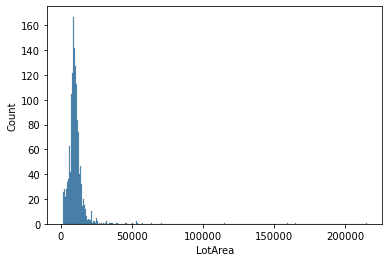

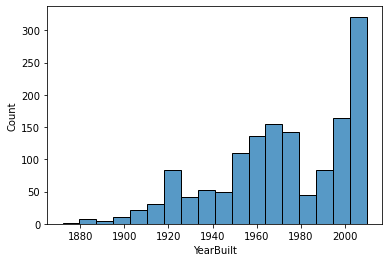

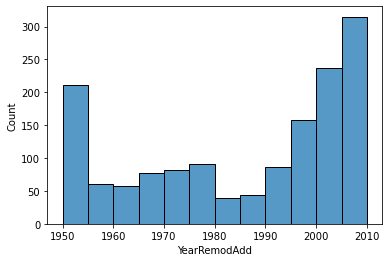

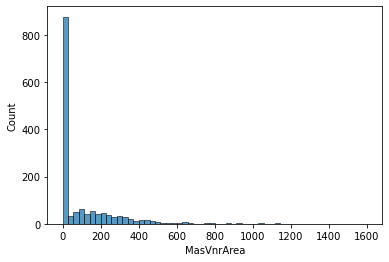

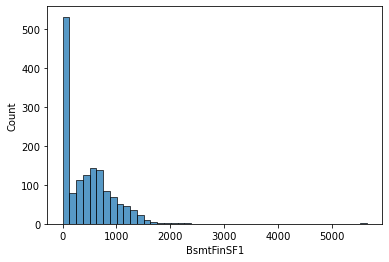

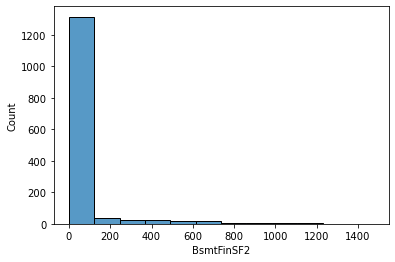

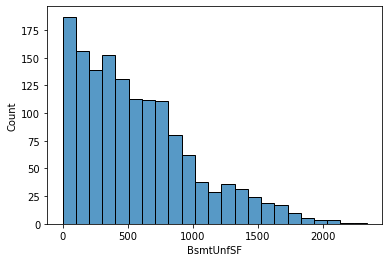

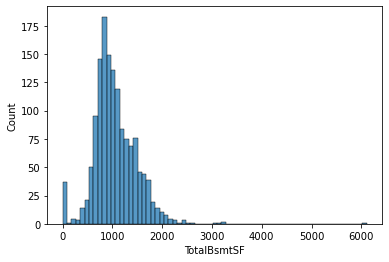

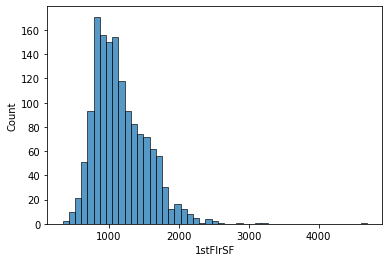

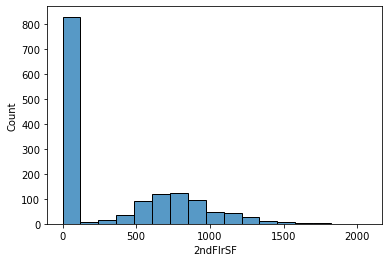

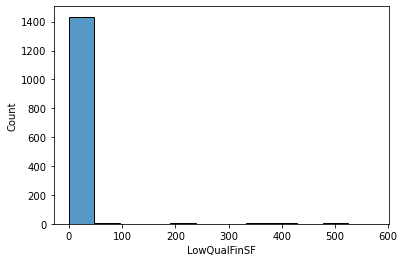

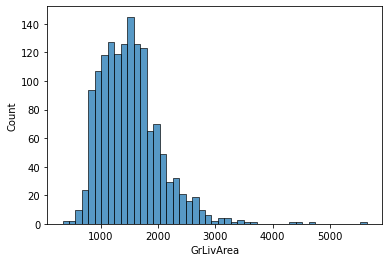

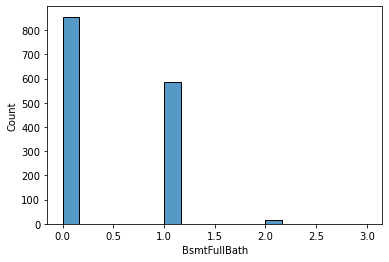

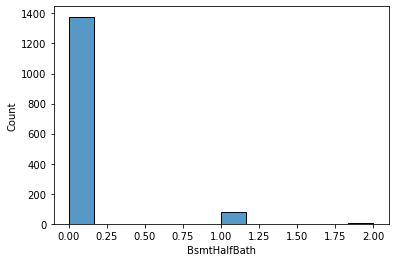

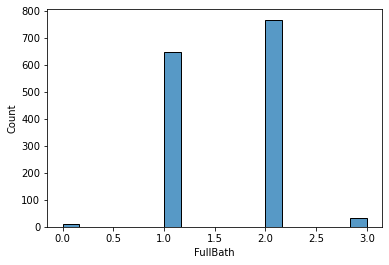

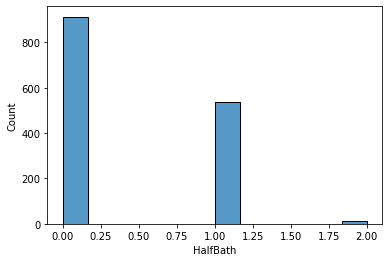

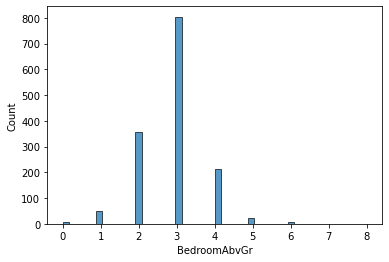

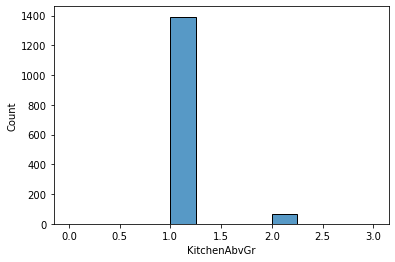

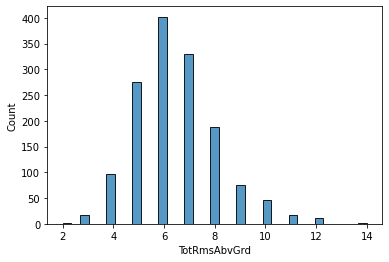

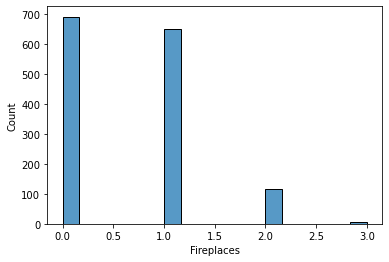

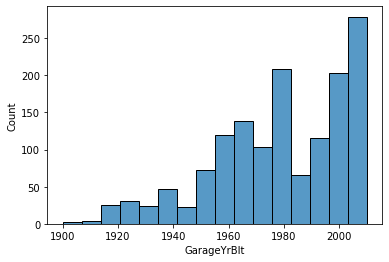

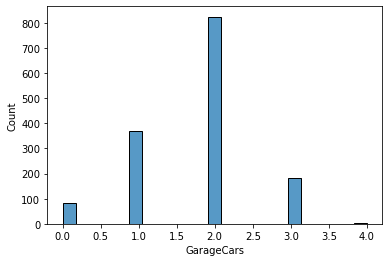

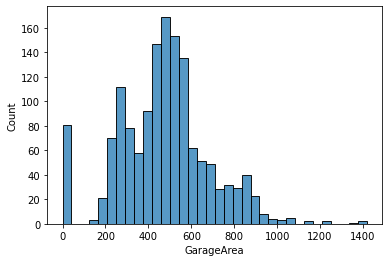

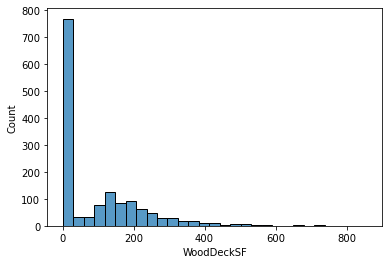

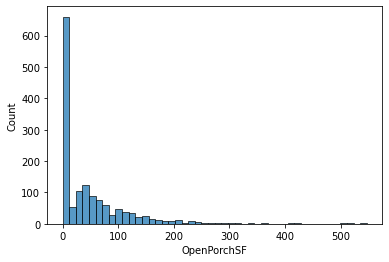

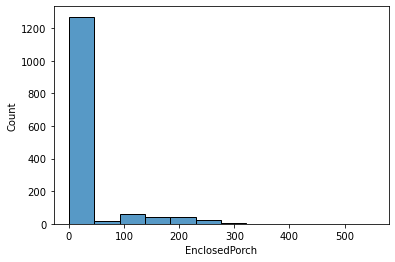

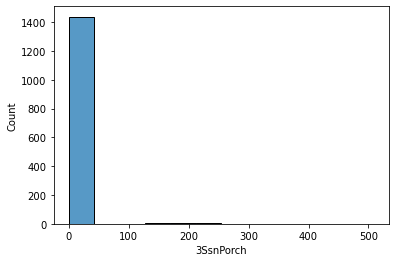

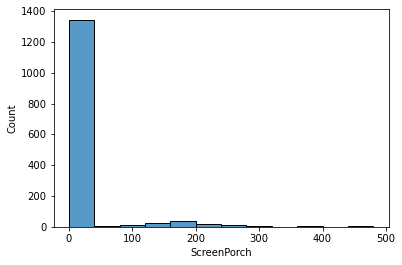

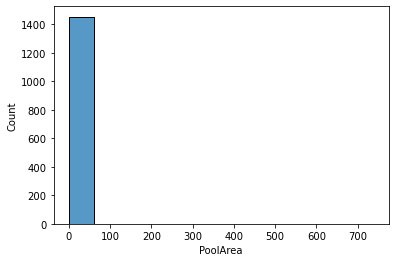

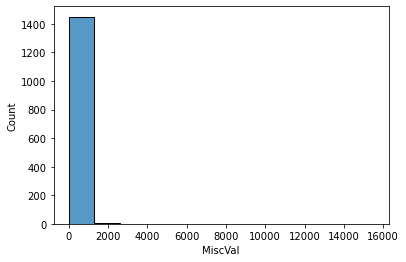

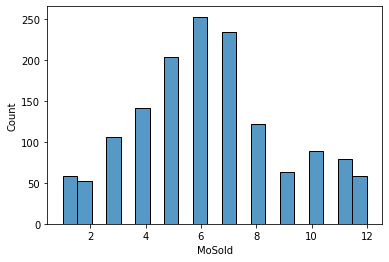

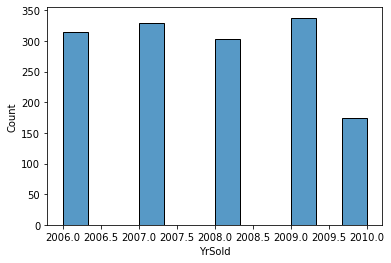

In [32]:
for i in num_cols:
    sns.histplot(x=house[i])
    plt.show()

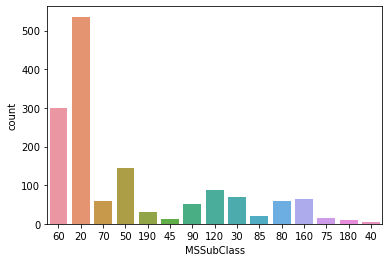

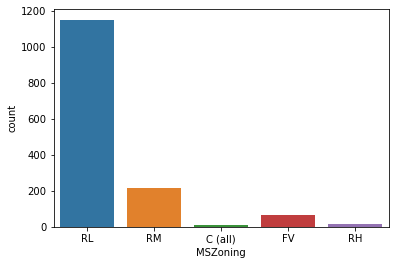

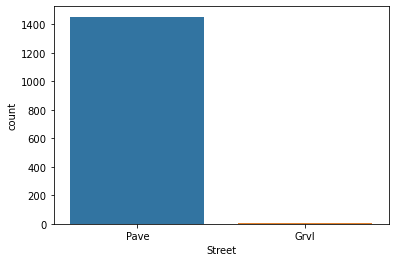

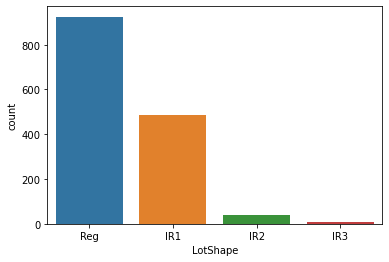

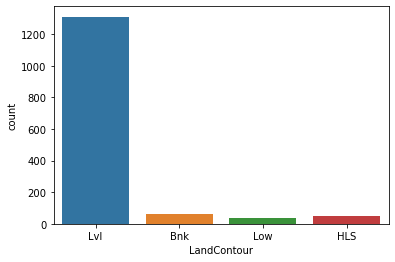

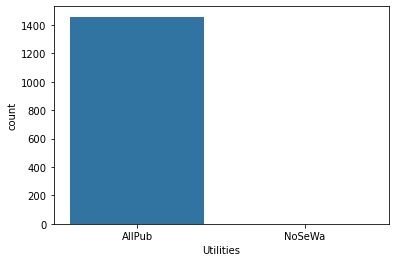

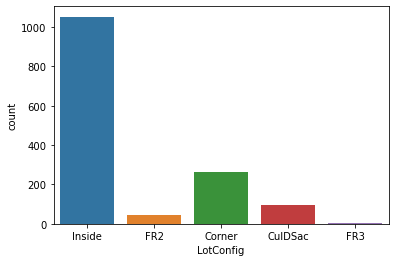

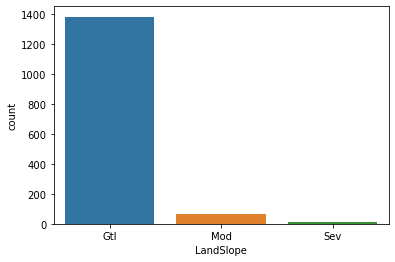

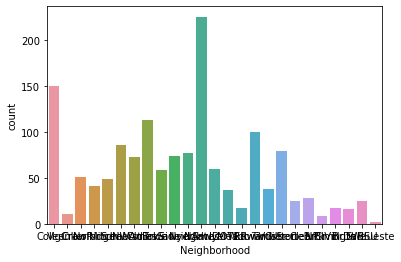

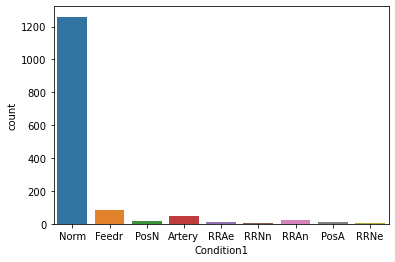

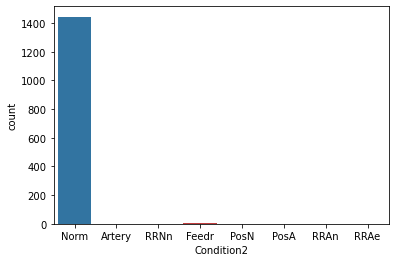

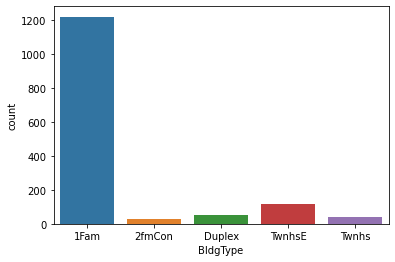

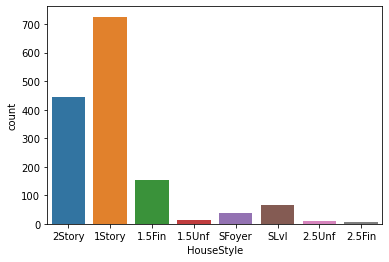

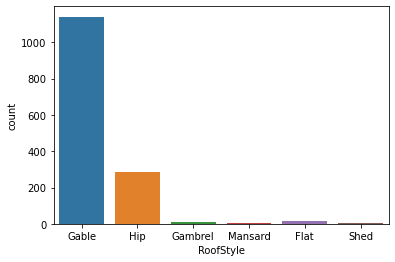

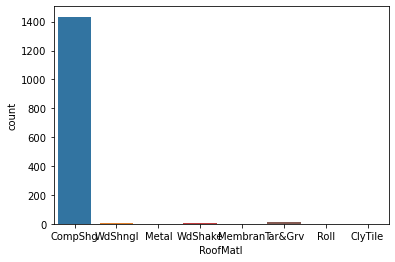

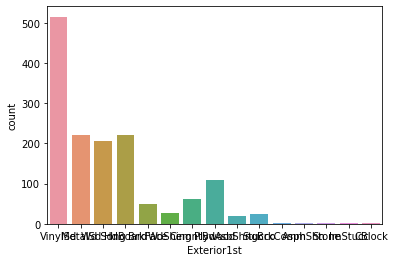

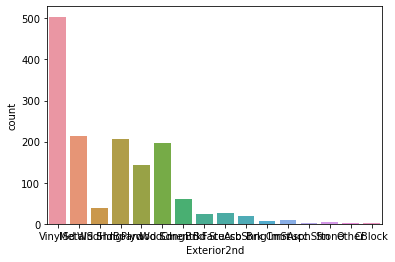

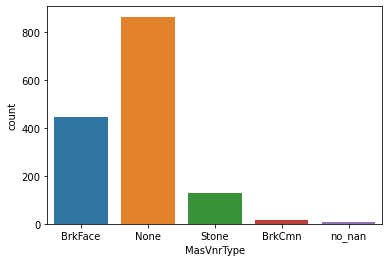

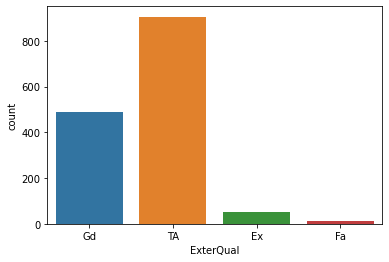

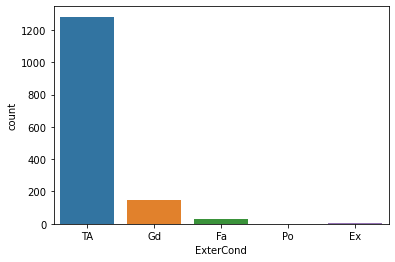

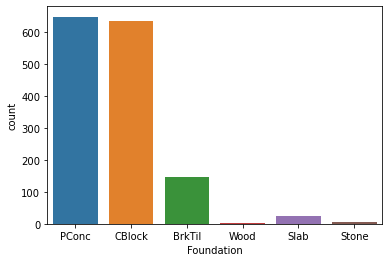

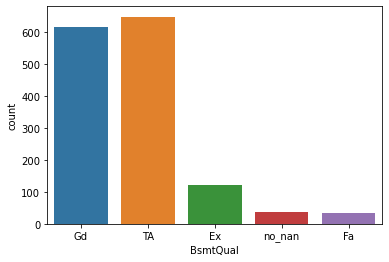

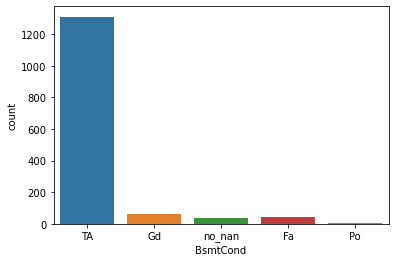

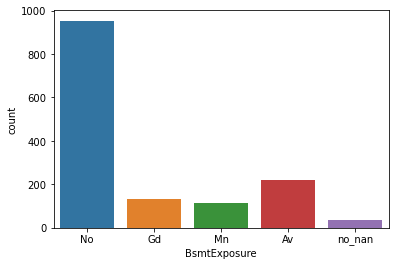

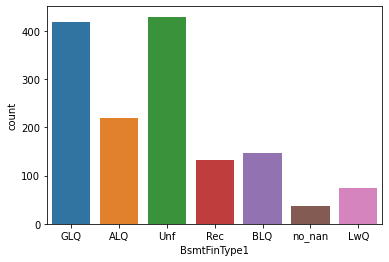

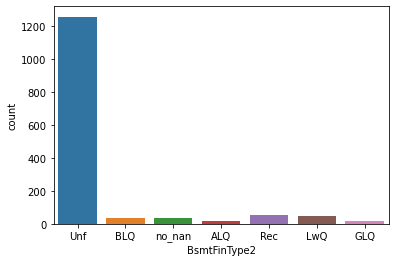

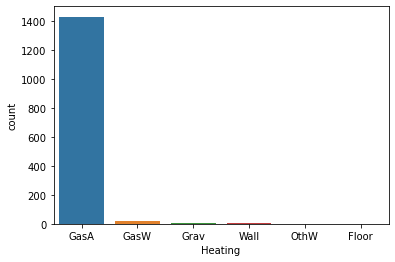

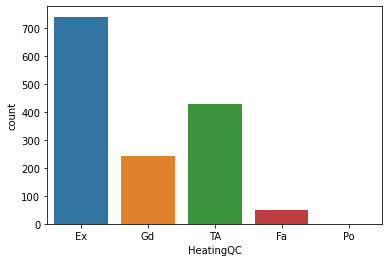

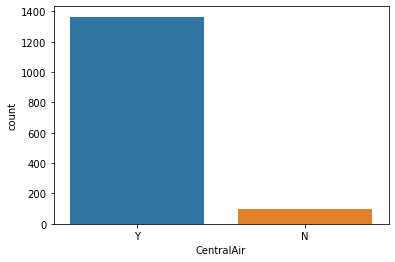

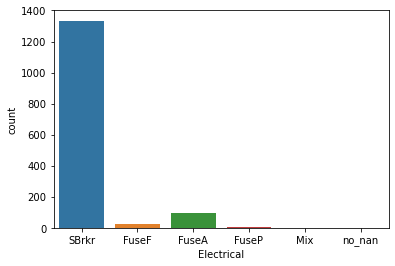

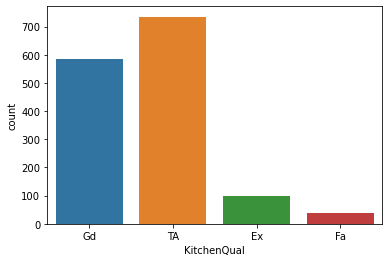

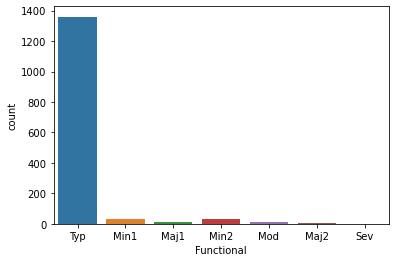

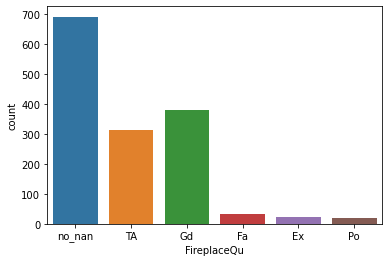

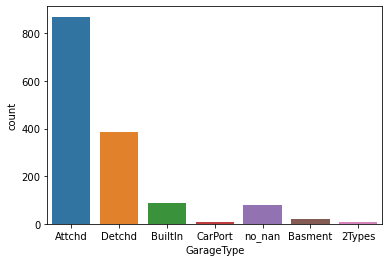

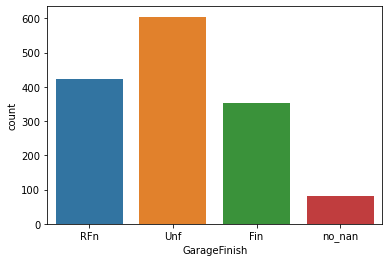

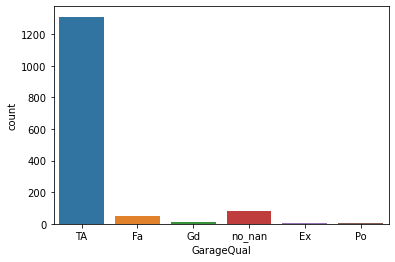

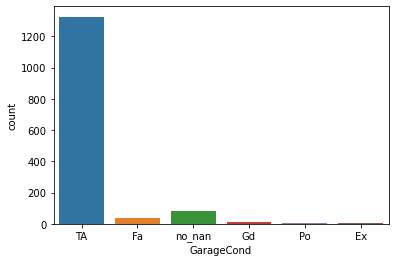

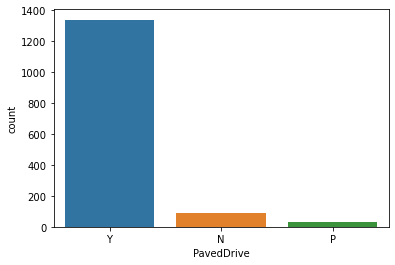

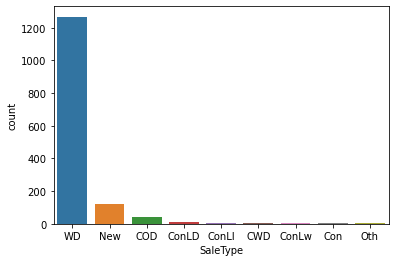

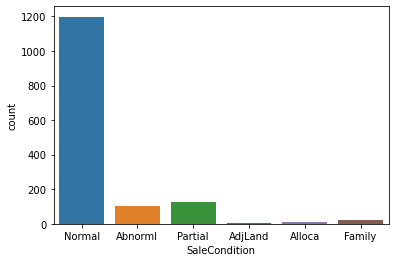

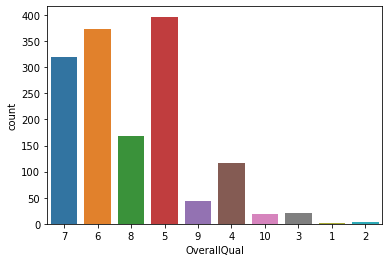

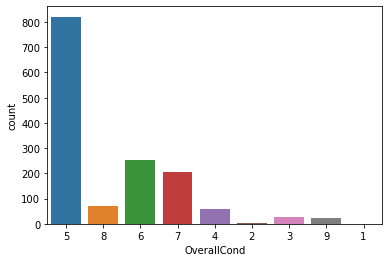

In [33]:
for i in cat_cols:
    sns.countplot(x=house[i])
    plt.show()

**Observation:**
- 20 is the highest value of MSSubClass
- RL is the majority of MSZoning
- Pave is the majority of Street
- Reg is the majority of LotShape
- Lvl is the majority of  LandContour
- AllPub is the majority of Utilities
- Inside is the majority of LotConfig
- Gtl is the majority of  LandSlope
- Norm is the majority of  Condition1 and Condition2
- 1Fam is the majority of  Bldg Type
- 1Story is the majority of  HouseStyle
- Gable is the majority of  RoofStyle
- TA is the majority of  ExterQual, ExterCond, BsmtCond, GarageQual and GarageCond
- PConc and CBlock is the majority of  Foundation
- GD and TA is the majority of BsmtQual
- No is the majority of BsmtExposure
- GLQ and Unf are the majority of BsmtFinType1
- Unf is the majority of BsmtFinType2
- GasA is the majority of Heating
- Ex is the majority of HeatingQC
- Y is the majority of CentralAir and Paved Drive
- SBrkr is the majority of Electrical
- TA then Gd are the majority of Functional
- Attchd is the majority of GarageType
- Unf then Rfn are the majority of GarageFinish
- WD is the majority of SaleType
- Normal is the majority of Sale condition
- 5 then 6 then 7 are the majority of OverallQual
- 5 is the majority of Overallcond

## Bivariate Analysis

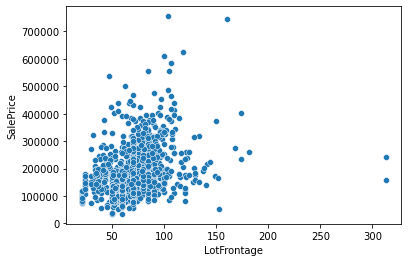

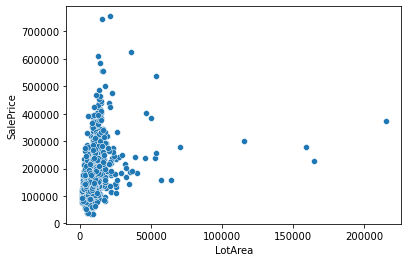

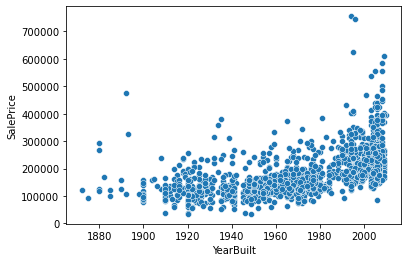

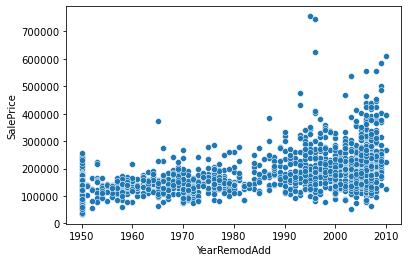

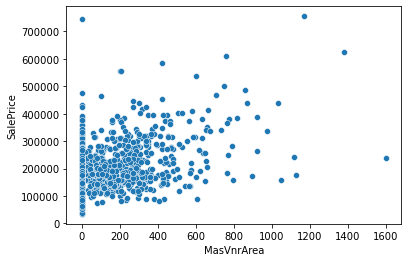

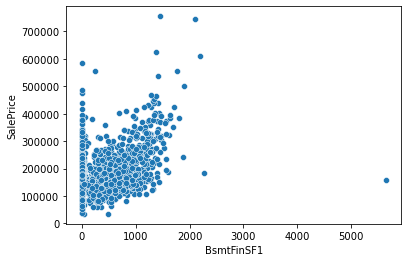

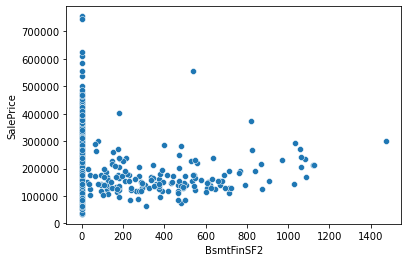

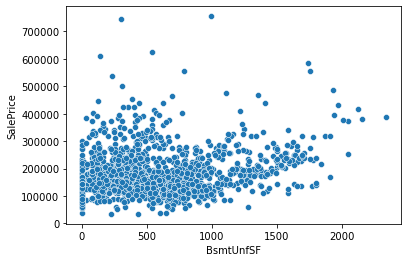

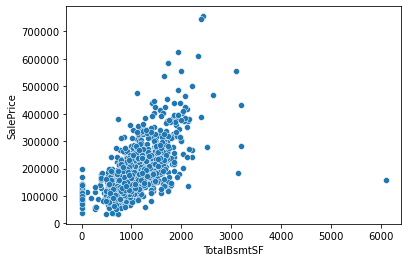

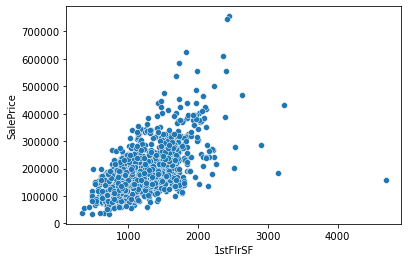

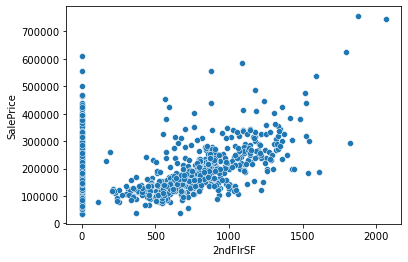

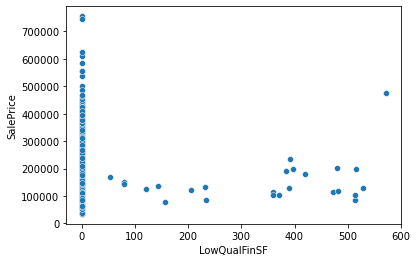

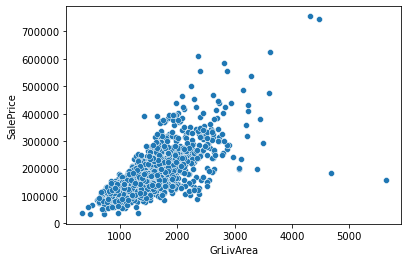

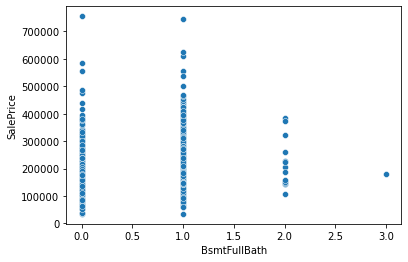

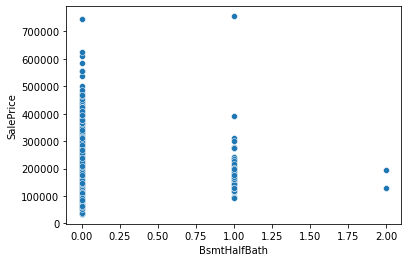

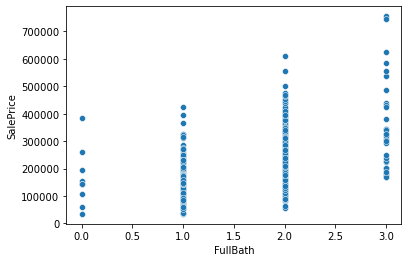

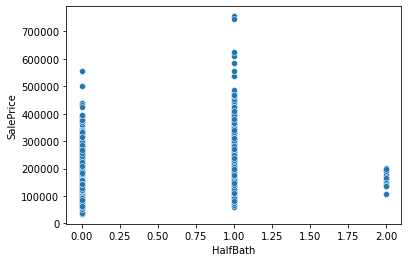

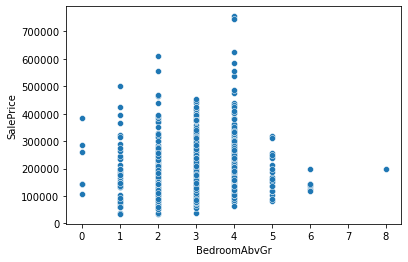

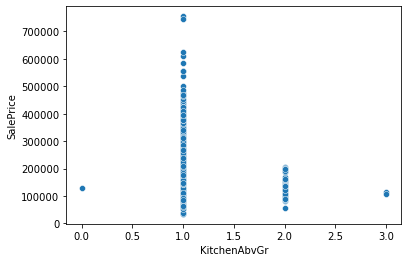

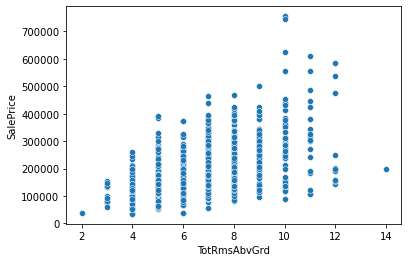

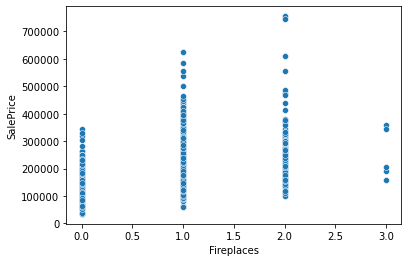

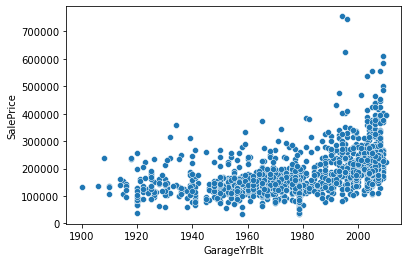

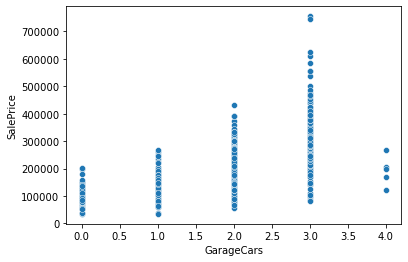

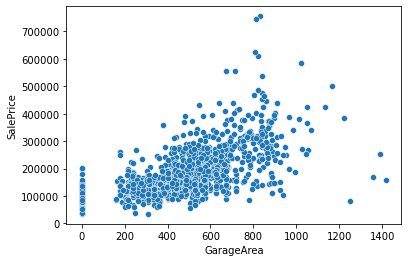

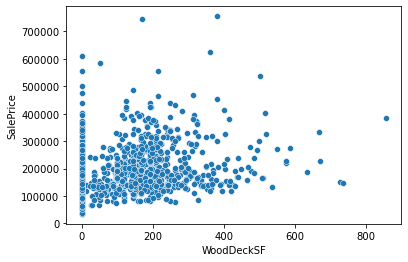

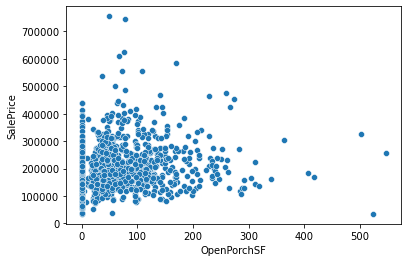

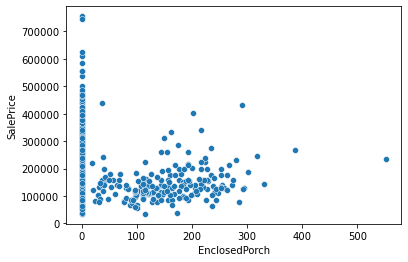

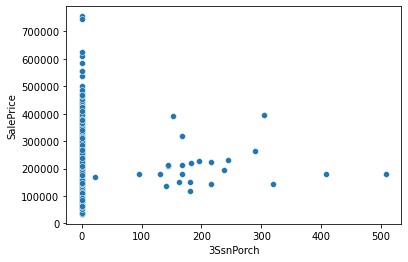

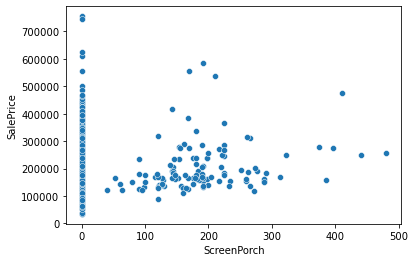

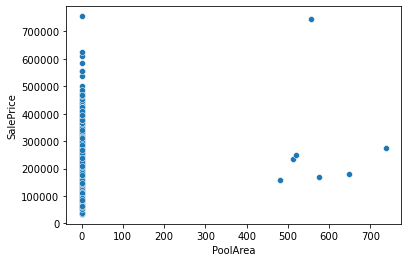

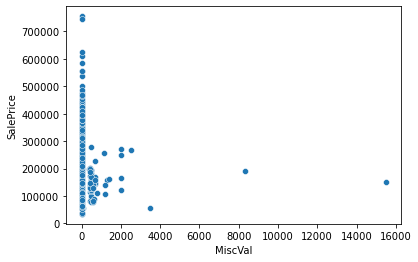

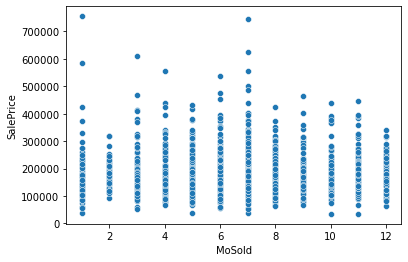

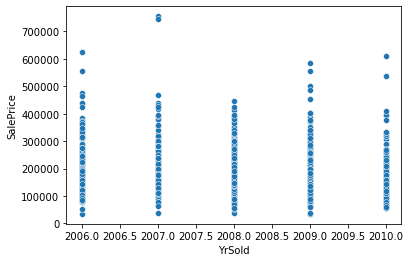

In [34]:
for i in num_cols:
    sns.scatterplot(x=house[i],y=house["SalePrice"])
    plt.show()

**Observation:**
- There is positive relationship between LotFrontage and SalePrice
- There is positive relationship between TotalBsmtSF and SalePrice
- There is positive relationship between 1stFlrSF and SalePrice
- There is positive relationship between GrLivArea and SalePrice
- The highest SalePrice at 3 of GarageCars
- The highest SalePrice at 10 of KitchenAbvGr
- The highest SalePrice at 0 of BsmtHalfBath
- The highest SalePrice at 0 of LowQualFinSF

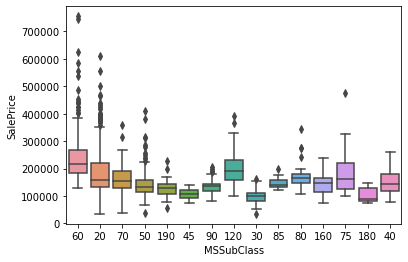

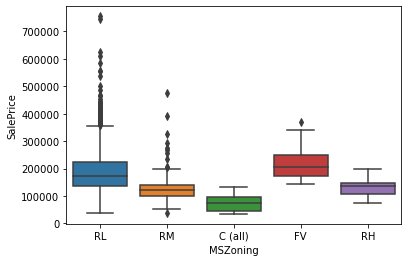

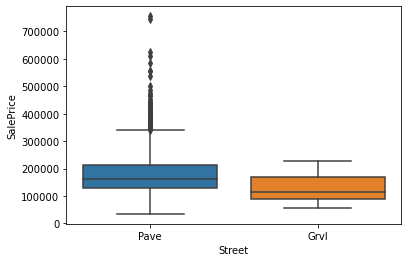

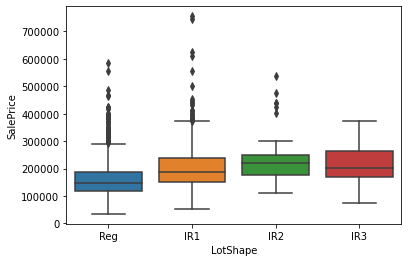

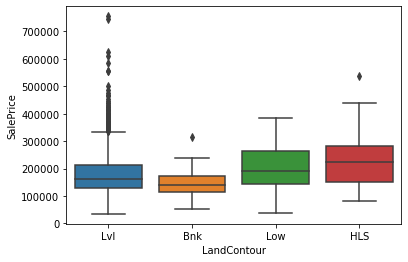

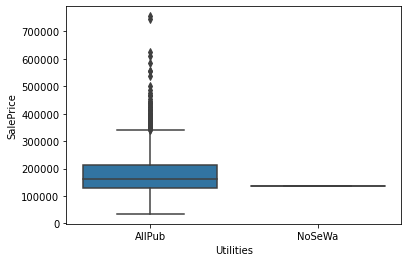

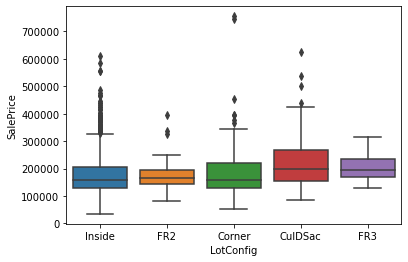

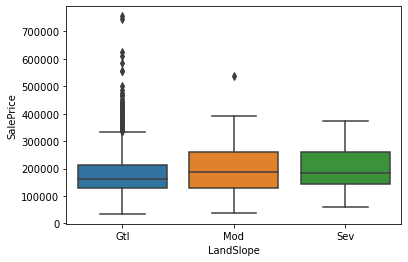

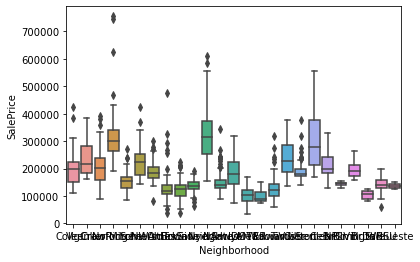

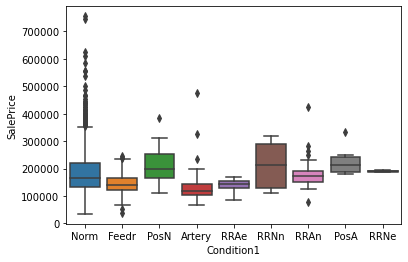

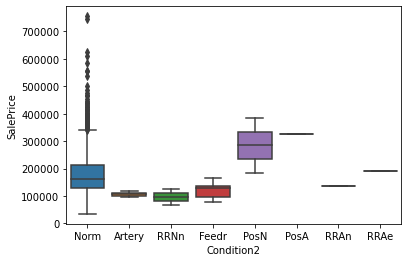

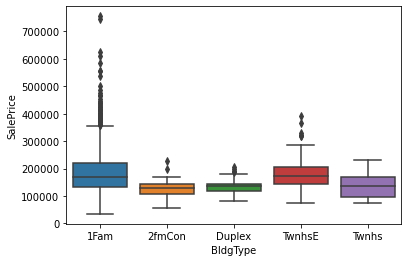

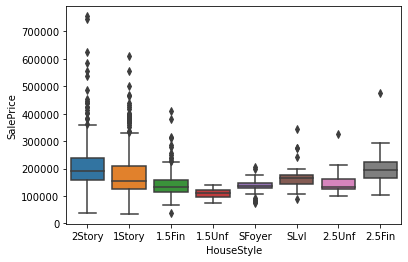

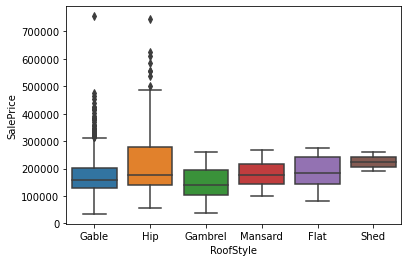

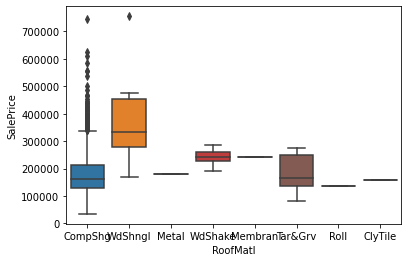

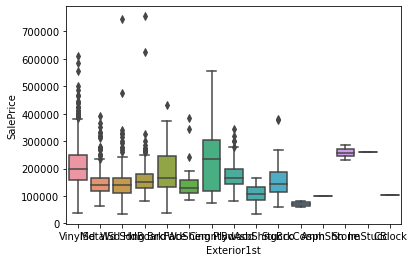

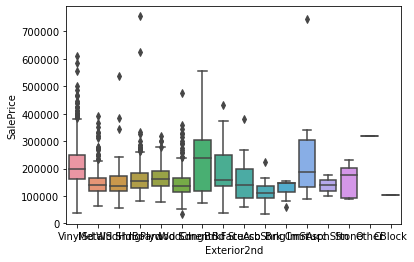

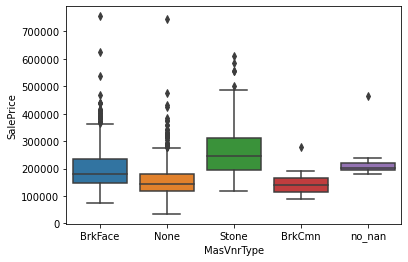

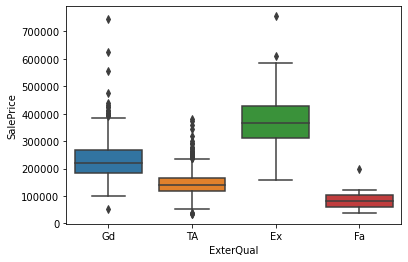

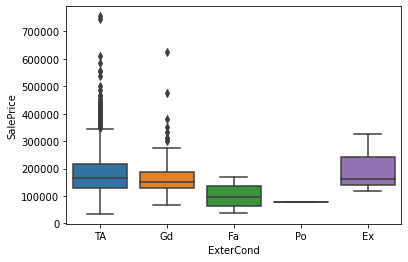

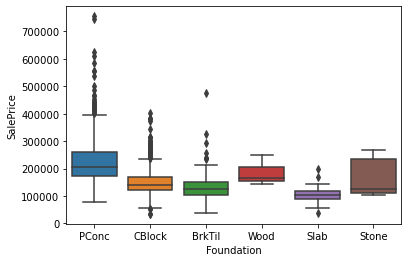

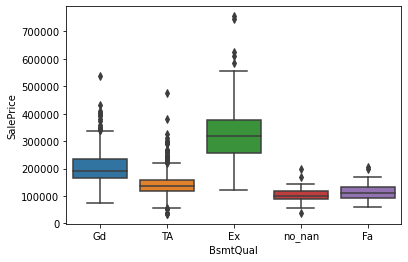

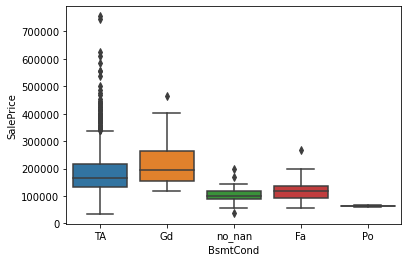

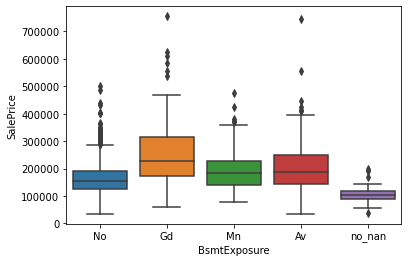

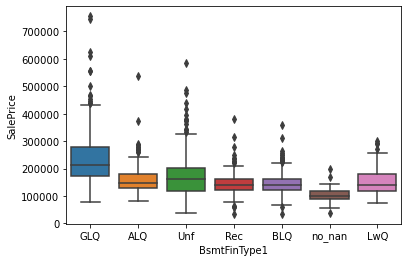

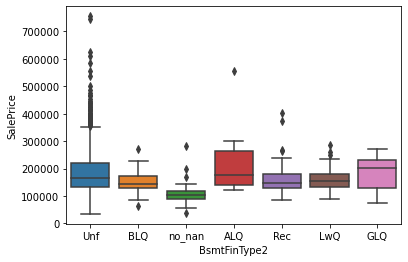

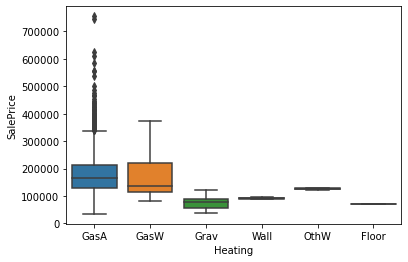

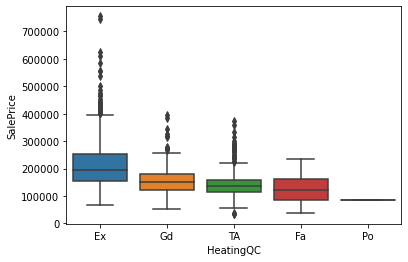

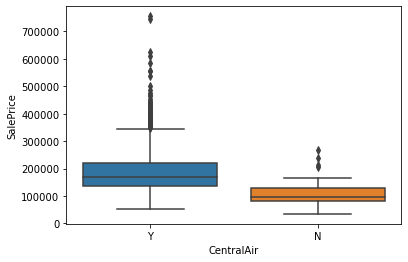

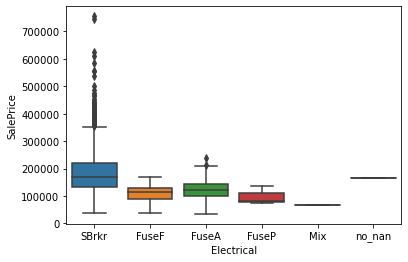

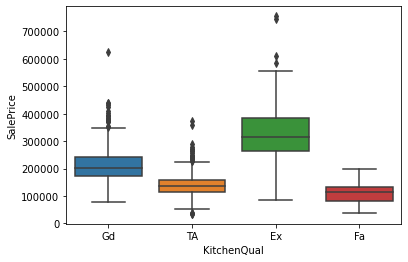

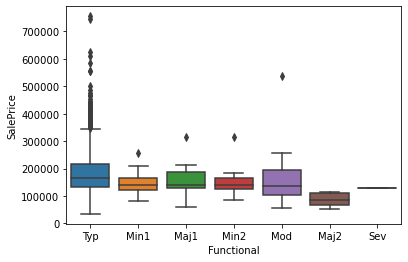

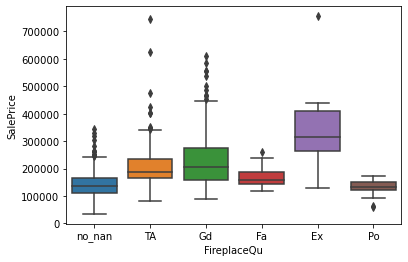

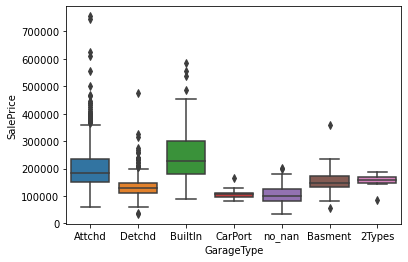

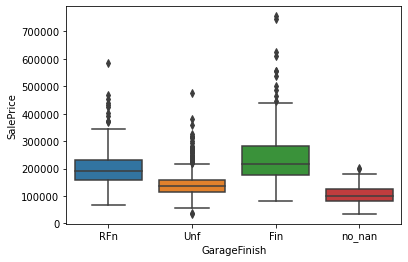

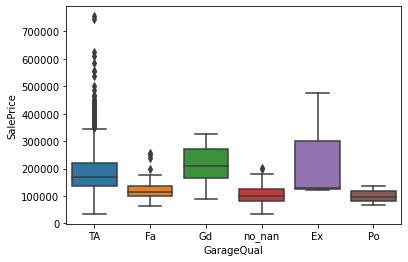

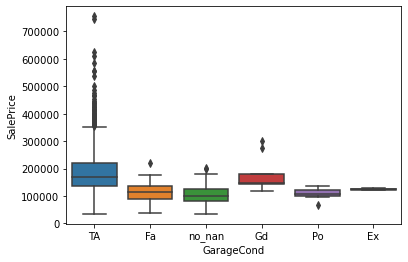

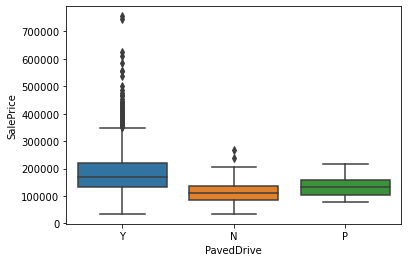

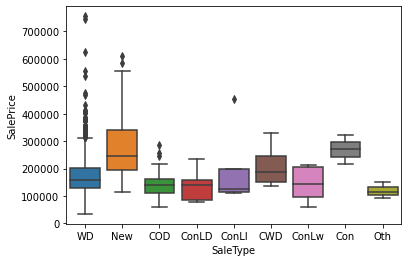

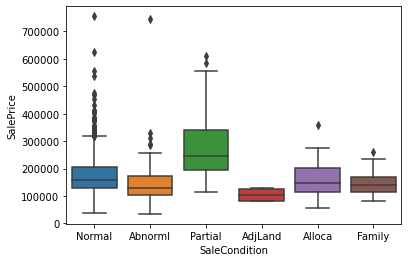

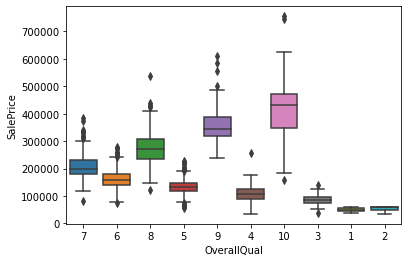

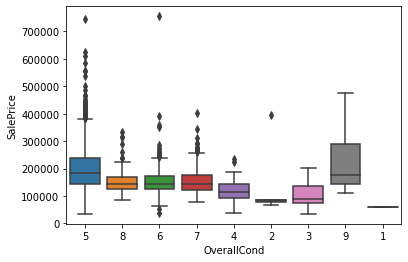

In [35]:
for i in cat_cols:
    sns.boxplot(x=house[i],y=house["SalePrice"])
    plt.show()

**Observation:**
- The SalePrice increase at Allpub of Utilities
- The SalePrice increase at PosN of Condition2
- The SalePrice increase at ExterQual of ExterQual
- The SalePrice increase at Ex of BsmtQual, HeatingQC, KitchenQual, FireplaceQu and GarageQual
- The SalePrice increase at Gd of BsmtExposure
- The SalePrice increase at Gd of BsmtExposure
- The SalePrice increase at Y of CentralAir
- The SalePrice increase at New of SaleType
- The SalePrice increase at Partial of SaleCondition
- The SalePrice increase at 10 of OverallQual
- The SalePrice increase at 9 of OverallCond

## Multivariate Analysis

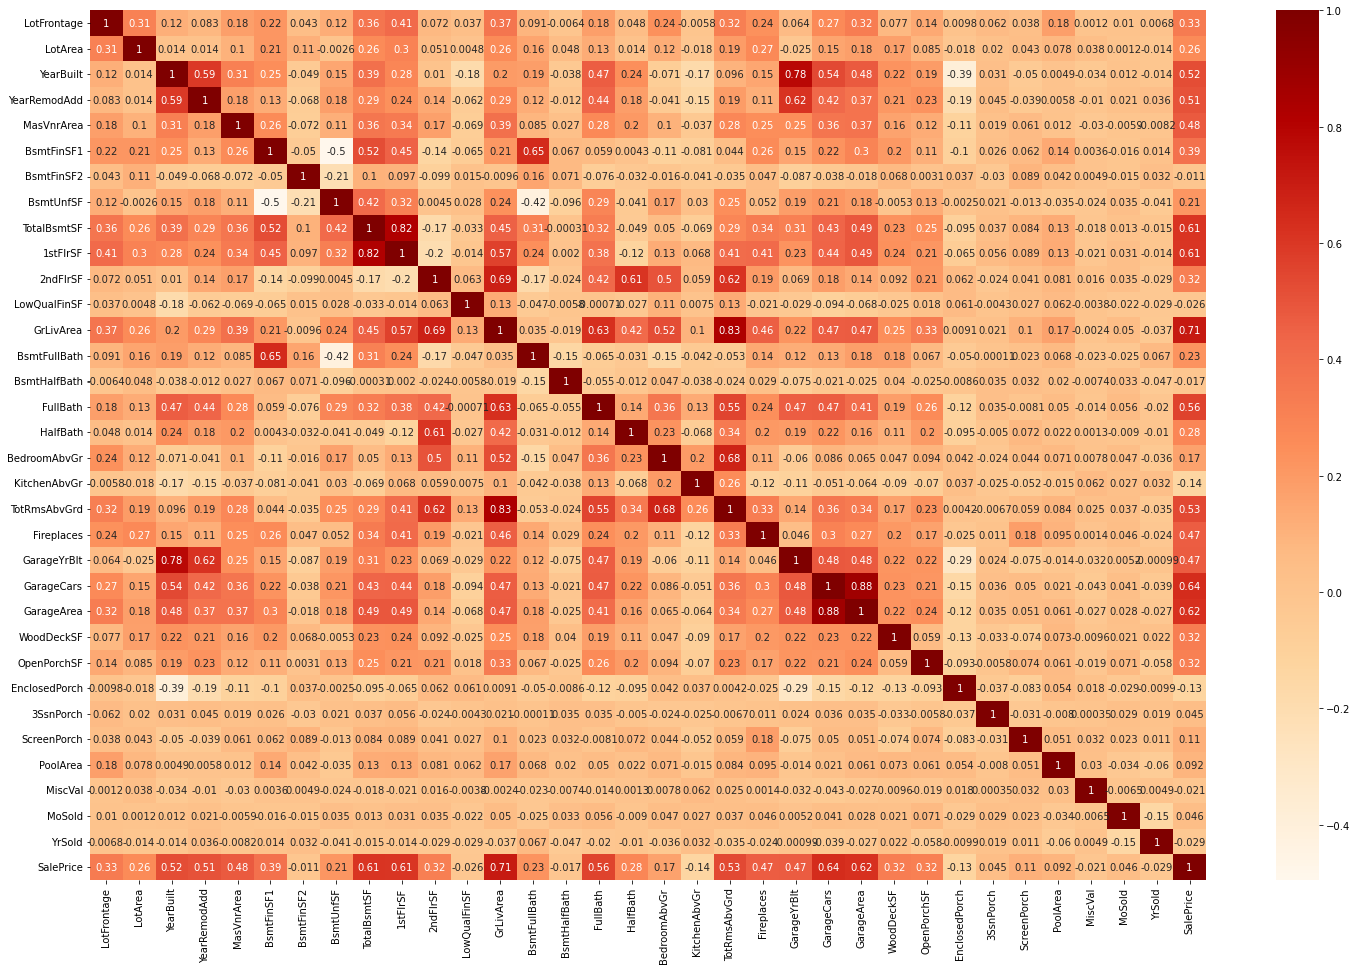

In [36]:
plt.figure(figsize = (25, 16))
sns.heatmap(house.corr(), annot = True, cmap="OrRd")
plt.show()

In [37]:
house.corr()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.306795   0.117598      0.082746    0.179283   
LotArea           0.306795  1.000000   0.014228      0.013788    0.103960   
YearBuilt         0.117598  0.014228   1.000000      0.592855    0.314745   
YearRemodAdd      0.082746  0.013788   0.592855      1.000000    0.179186   
MasVnrArea        0.179283  0.103960   0.314745      0.179186    1.000000   
BsmtFinSF1        0.215828  0.214103   0.249503      0.128451    0.263582   
BsmtFinSF2        0.043340  0.111170  -0.049107     -0.067759   -0.072302   
BsmtUnfSF         0.122156 -0.002618   0.149040      0.181133    0.114184   
TotalBsmtSF       0.363358  0.260833   0.391452      0.291066    0.362452   
1stFlrSF          0.414266  0.299475   0.281986      0.240379    0.342160   
2ndFlrSF          0.072483  0.050986   0.010308      0.140024    0.174019   
LowQualFinSF      0.036849  0.004779  -0.183784     -0.062419   -0.069068   
GrLivArea         0.368392  0.263116   0.199010      0.287389    0.389893   
BsmtFullBath      0.091481  0.158155   0.187599      0.119470    0.085055   
BsmtHalfBath     -0.006419  0.048046  -0.038162     -0.012337    0.026669   
FullBath          0.180424  0.126031   0.468271      0.439046    0.275730   
HalfBath          0.048258  0.014259   0.242656      0.183331    0.200802   
BedroomAbvGr      0.237023  0.119690  -0.070651     -0.040581    0.102417   
KitchenAbvGr     -0.005805 -0.017784  -0.174800     -0.149598   -0.037364   
TotRmsAbvGrd      0.320146  0.190015   0.095589      0.191740    0.280027   
Fireplaces        0.235755  0.271364   0.147716      0.112581    0.247906   
GarageYrBlt       0.064324 -0.024812   0.780555      0.618130    0.249367   
GarageCars        0.269729  0.154871   0.537850      0.420622    0.363778   
GarageArea        0.323663  0.180403   0.478954      0.371600    0.372567   
WoodDeckSF        0.077106  0.171698   0.224880      0.205726    0.159349   
OpenPorchSF       0.137454  0.084774   0.188686      0.226298    0.124965   
EnclosedPorch     0.009790 -0.018340  -0.387268     -0.193919   -0.109849   
3SsnPorch         0.062335  0.020423   0.031355      0.045286    0.018795   
ScreenPorch       0.037684  0.043160  -0.050364     -0.038740    0.061453   
PoolArea          0.180868  0.077672   0.004950      0.005829    0.011723   
MiscVal           0.001168  0.038068  -0.034383     -0.010286   -0.029815   
MoSold            0.010158  0.001205   0.012398      0.021490   -0.005940   
YrSold            0.006768 -0.014261  -0.013618      0.035743   -0.008184   
SalePrice         0.334901  0.263843   0.522897      0.507101    0.475241   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.215828    0.043340   0.122156     0.363358  0.414266  ...   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475  ...   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986  ...   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379  ...   
MasVnrArea       0.263582   -0.072302   0.114184     0.362452  0.342160  ...   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863  ...   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117  ...   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987  ...   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530  ...   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000  ...   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646  ...   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241  ...   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024  ...   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671  ...   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956  ...   
FullBath         0.058543   -0.076444  

**Observation:**
- The SalePrice and GrLivArea has a strong correlation (0.71)
- The SalePrice and GarageCars, GarageArea, TotalBsmtSFand 1stFlrSF has a positive correlation (>0.60)
- The SalePrice and FullBath, TotRmsAbvGrd, YearBuilt and YearRemodAdd has a positive correlation (>0.50)
- The SalePrice and BsmtFinSF2, BsmtHalfBath, MiscVal, LowQualFinSF, YrSold, EnclosedPorch and KitchenAbvGr has a negitave correlation


## Pre-processing Steps

### Dummy Variable Creation

In [38]:
#check the value count for OverallCond
house['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [39]:
#convert data type to in for numerical columns
house[num_cols] = house[num_cols].astype(int)
house[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotFrontage    1460 non-null   int32
 1   LotArea        1460 non-null   int32
 2   YearBuilt      1460 non-null   int32
 3   YearRemodAdd   1460 non-null   int32
 4   MasVnrArea     1460 non-null   int32
 5   BsmtFinSF1     1460 non-null   int32
 6   BsmtFinSF2     1460 non-null   int32
 7   BsmtUnfSF      1460 non-null   int32
 8   TotalBsmtSF    1460 non-null   int32
 9   1stFlrSF       1460 non-null   int32
 10  2ndFlrSF       1460 non-null   int32
 11  LowQualFinSF   1460 non-null   int32
 12  GrLivArea      1460 non-null   int32
 13  BsmtFullBath   1460 non-null   int32
 14  BsmtHalfBath   1460 non-null   int32
 15  FullBath       1460 non-null   int32
 16  HalfBath       1460 non-null   int32
 17  BedroomAbvGr   1460 non-null   int32
 18  KitchenAbvGr   1460 non-null   int32
 19  TotRms

In [40]:
# Creating Dummy variables
for col in cat_cols:
    dum_cols = pd.get_dummies(house[col],drop_first=True,prefix=col)
    house = pd.concat([house, dum_cols], axis=True)

In [41]:
# Dropping original variables 
house.drop(cat_cols,axis=1,inplace=True)
house.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           65     8450       2003          2003         196         706   
1           80     9600       1976          1976           0         978   
2           68    11250       2001          2002         162         486   
3           60     9550       1915          1970           0         216   
4           84    14260       2000          2000         350         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  OverallQual_8  \
0           0        150          856       856  ...              0   
1           0        284         1262      1262  ...              0   
2           0        434          920       920  ...              0   
3           0        540          756       961  ...              0   
4           0        490         1145      1145  ...              1   

   OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  
0              0              0              0              0  
1              0              0              1              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 277 columns]

### Splitting the Data into Training and Testing Sets

In [42]:
# Separate the features (X) and the target variable (y)
X = house.drop('SalePrice', axis=1)
y = house['SalePrice']


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Rescalling 

In [44]:
scaler = MinMaxScaler()
# fit and transform the trainig set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_train.head()


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210      0.157534  0.019306   0.384058      0.000000        0.00    0.082920   
318      0.236301  0.039403   0.876812      0.716667        0.16    0.174876   
239      0.106164  0.033981   0.528986      0.000000        0.00    0.016655   
986      0.130137  0.017931   0.275362      0.883333        0.00    0.000000   
1416     0.133562  0.046139   0.094203      0.000000        0.00    0.000000   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  OverallQual_8  \
210          0.0   0.169521     0.141408  0.113889  ...              0   
318          0.0   0.154110     0.220458  0.231481  ...              0   
239          0.0   0.274401     0.120295  0.098611  ...              0   
986          0.0   0.207620     0.079378  0.145602  ...              0   
1416         0.0   0.332620     0.127169  0.202315  ...              0   

      OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              1   
986               0              0              0              0   
1416              0              0              0              0   

      OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
210               0              1              0              0   
318               1              0              0              0   
239               0              0              0              0   
986               0              0              0              1   
1416              0              1              0              0   

      OverallCond_9  
210               0  
318               0  
239               0  
986               0  
1416              0  

[5 rows x 276 columns]

In [45]:

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1436     0.133562  0.048827   0.716418      0.350000     0.00000    0.281536   
57       0.232877  0.065599   0.962687      0.900000     0.00000    0.000000   
780      0.143836  0.041693   0.895522      0.766667     0.04126    0.000000   
382      0.198630  0.050380   0.977612      0.933333     0.00000    0.000000   
1170     0.188356  0.054407   0.761194      0.450000     0.00000    0.238574   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  OverallQual_8  \
1436         0.0   0.128165     0.342314  0.242009  ...              0   
57           0.0   0.444444     0.340729  0.240183  ...              0   
780          0.0   0.639276     0.490095  0.419635  ...              0   
382          0.0   0.485271     0.372029  0.276256  ...              0   
1170         0.0   0.296641     0.434231  0.357991  ...              0   

      OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  \
1436              0              0              0              0   
57                0              0              0              0   
780               0              0              0              0   
382               0              0              0              0   
1170              0              0              0              0   

      OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
1436              0              1              0              0   
57                1              0              0              0   
780               1              0              0              0   
382               1              0              0              0   
1170              0              1              0              0   

      OverallCond_9  
1436              0  
57                0  
780               0  
382               0  
1170              0  

[5 rows x 276 columns]

### Feature Selection using REF

In [46]:
# Build the Model
mlr = LinearRegression()
mlr.fit(X_train,y_train)

rfe = RFE(mlr,step=25)
rfe = rfe.fit(X_train,y_train)

In [47]:
#The code line zips three lists together: X_train.columns, rfe.support_, and rfe.ranking_. 
#It creates tuples with elements from each list.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 7),
 ('FullBath', False, 4),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 3),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 5),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 4),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 5),
 ('YrSold', False, 6),
 ('MSSubClass_160', False, 6),
 ('MSSubClass_180', False, 7),
 ('MSSubClass_190', True, 1),
 ('MSSubClass_20', False, 7),
 ('MSSubClass_30

In [48]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object', length=138)

Now we will only use columns selected by RFE for our model and build the model

In [49]:
# Create X_test dataframe with RFE 
X_train_rfe = X_train[cols]

In [50]:
# Add a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
# Run the linear model
mlr = sm.OLS(y_train,X_train_rfe).fit()

In [52]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:28   Log-Likelihood:                 2344.0
No. Observations:                1022   AIC:                            -4448.
Df Residuals:                     902   BIC:                            -3856.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9928      0.045    -22.053      0.000      -1.081      -0.904
LotFrontage               0.0361      0.016      2.190      0.029       0.004       0.068
LotArea                   0.1751      0.026      6.700      0.000       0.124       0.226
YearBuilt                 0.0841      0.010      8.123      0.000       0.064       0.104
YearRemodAdd              0.0132      0.004      3.156      0.002       0.005       0.021
MasVnrArea                0.0243      0.009      2.686      0.007       0.007       0.042
BsmtFinSF1                0.1882      0.017     10.786      0.000       0.154       0.222
BsmtFinSF2                0.0348      0.009      3.995      0.000       0.018       0.052
BsmtUnfSF                 0.0274      0.008      3.549      0.000       0.012       0.043
TotalBsmtSF               0.1927      0.019     10.323      0.000       0.156       0.229
1stFlrSF                  0.1669      0.016     10.437      0.000       0.135       0.198
2ndFlrSF                  0.1207      0.007     17.957      0.000       0.108       0.134
LowQualFinSF             -0.0131      0.011     -1.234      0.217      -0.034       0.008
GrLivArea                 0.1977      0.012     16.009      0.000       0.173       0.222
BsmtFullBath              0.0122      0.007      1.762      0.078      -0.001       0.026
BedroomAbvGr             -0.0463      0.013     -3.621      0.000      -0.071      -0.021
KitchenAbvGr             -0.0507      0.015     -3.360      0.001      -0.080      -0.021
Fireplaces                0.0090      0.005      1.735      0.083      -0.001       0.019
GarageYrBlt               0.0160      0.008      1.880      0.060      -0.001       0.033
GarageCars                0.0122      0.012      1.007      0.314      -0.012       0.036
GarageArea                0.0214      0.015      1.422      0.155      -0.008       0.051
3SsnPorch                 0.0238      0.014      1.741      0.082      -0.003       0.051
PoolArea                  0.0712      0.019      3.702      0.000       0.033       0.109
MiscVal                   0.0318      0.025      1.267      0.206      -0.017       0.081
MSSubClass_190           -0.0078      0.004     -2.075      0.038      -0.015      -0.000
MSSubClass_75            -0.0477      0.017     -2.889      0.004      -0.080      -0.015
MSSubClass_90            -0.0108      0.004     -2.610      0.009      -0.019      -0.003
MSZoning_FV               0.0417      0.015      2.723      0.007       0.012       0.072
MSZoning_RH               0.0565      0.015      3.705      0.000       0.027       0.086
MSZoning_RL               0.0542      0.013      4.135      0.000       0.028       0.080
MSZoning_RM               0.0534      0.013      4.202      0.000       0.028       0.078
Street_Pave            

In [53]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)

#Performing Recursive Feature Elimination (RFE) with the output variable count set to 22.
rfe = RFE(mlr,step=22)
rfe = rfe.fit(X_train,y_train)
cols = X_train.columns[rfe.support_]
# Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]
# Add a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Run the linear model
mlr = sm.OLS(y_train,X_train_rfe).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:28   Log-Likelihood:                 2341.8
No. Observations:                1022   AIC:                            -4444.
Df Residuals:                     902   BIC:                            -3852.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0433      0.046    -22.617      0.000      -1.134      -0.953
LotFrontage               0.0474      0.016      3.008      0.003       0.016       0.078
LotArea                   0.1879      0.027      7.054      0.000       0.136       0.240
YearBuilt                 0.0820      0.010      7.860      0.000       0.062       0.103
YearRemodAdd              0.0129      0.004      3.077      0.002       0.005       0.021
MasVnrArea                0.0205      0.009      2.279      0.023       0.003       0.038
BsmtFinSF1                0.1992      0.017     11.909      0.000       0.166       0.232
BsmtFinSF2                0.0345      0.009      3.945      0.000       0.017       0.052
BsmtUnfSF                 0.0220      0.008      2.919      0.004       0.007       0.037
TotalBsmtSF               0.2007      0.018     10.959      0.000       0.165       0.237
1stFlrSF                  0.1637      0.016     10.209      0.000       0.132       0.195
2ndFlrSF                  0.1198      0.007     17.660      0.000       0.107       0.133
LowQualFinSF             -0.0142      0.011     -1.339      0.181      -0.035       0.007
GrLivArea                 0.1952      0.012     15.737      0.000       0.171       0.220
BedroomAbvGr             -0.0385      0.012     -3.104      0.002      -0.063      -0.014
KitchenAbvGr             -0.0538      0.016     -3.471      0.001      -0.084      -0.023
Fireplaces                0.0113      0.010      1.109      0.268      -0.009       0.031
GarageYrBlt               0.0149      0.009      1.751      0.080      -0.002       0.032
GarageCars                0.0137      0.012      1.134      0.257      -0.010       0.037
GarageArea                0.0287      0.015      1.925      0.055      -0.001       0.058
OpenPorchSF               0.0116      0.008      1.483      0.139      -0.004       0.027
3SsnPorch                 0.0225      0.014      1.643      0.101      -0.004       0.049
PoolArea                  0.0677      0.019      3.510      0.000       0.030       0.106
MiscVal                   0.0333      0.025      1.324      0.186      -0.016       0.083
MSSubClass_190           -0.0064      0.004     -1.671      0.095      -0.014       0.001
MSSubClass_45            -0.0132      0.026     -0.509      0.611      -0.064       0.038
MSSubClass_75            -0.0474      0.017     -2.848      0.005      -0.080      -0.015
MSSubClass_90            -0.0093      0.004     -2.211      0.027      -0.018      -0.001
MSZoning_FV               0.0451      0.015      2.933      0.003       0.015       0.075
MSZoning_RH               0.0597      0.015      3.888      0.000       0.030       0.090
MSZoning_RL               0.0604      0.013      4.602      0.000       0.035       0.086
MSZoning_RM            

In [54]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
67   Exterior1st_CBlock  inf
50      BldgType_2fmCon  inf
113       GarageCond_Po  inf
112       GarageCond_Gd  inf
111       GarageCond_Fa  inf
..                  ...  ...
0                 const  0.0
74    Exterior2nd_Other  NaN
75         ExterCond_Po  NaN
92       Electrical_Mix  NaN
93    Electrical_no_nan  NaN

[139 rows x 2 columns]

In [55]:
# drop Exterior1st_AsphShn which has higest P value
X_train_rfe = X_train_rfe.drop(['Exterior1st_AsphShn'],axis=1)


In [56]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                 2341.8
No. Observations:                1022   AIC:                            -4444.
Df Residuals:                     902   BIC:                            -3852.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0433      0.046    -22.617      0.000      -1.134      -0.953
LotFrontage               0.0474      0.016      3.008      0.003       0.016       0.078
LotArea                   0.1879      0.027      7.054      0.000       0.136       0.240
YearBuilt                 0.0820      0.010      7.860      0.000       0.062       0.103
YearRemodAdd              0.0129      0.004      3.077      0.002       0.005       0.021
MasVnrArea                0.0205      0.009      2.279      0.023       0.003       0.038
BsmtFinSF1                0.1992      0.017     11.909      0.000       0.166       0.232
BsmtFinSF2                0.0345      0.009      3.945      0.000       0.017       0.052
BsmtUnfSF                 0.0220      0.008      2.919      0.004       0.007       0.037
TotalBsmtSF               0.2007      0.018     10.959      0.000       0.165       0.237
1stFlrSF                  0.1637      0.016     10.209      0.000       0.132       0.195
2ndFlrSF                  0.1198      0.007     17.660      0.000       0.107       0.133
LowQualFinSF             -0.0142      0.011     -1.339      0.181      -0.035       0.007
GrLivArea                 0.1952      0.012     15.737      0.000       0.171       0.220
BedroomAbvGr             -0.0385      0.012     -3.104      0.002      -0.063      -0.014
KitchenAbvGr             -0.0538      0.016     -3.471      0.001      -0.084      -0.023
Fireplaces                0.0113      0.010      1.109      0.268      -0.009       0.031
GarageYrBlt               0.0149      0.009      1.751      0.080      -0.002       0.032
GarageCars                0.0137      0.012      1.134      0.257      -0.010       0.037
GarageArea                0.0287      0.015      1.925      0.055      -0.001       0.058
OpenPorchSF               0.0116      0.008      1.483      0.139      -0.004       0.027
3SsnPorch                 0.0225      0.014      1.643      0.101      -0.004       0.049
PoolArea                  0.0677      0.019      3.510      0.000       0.030       0.106
MiscVal                   0.0333      0.025      1.324      0.186      -0.016       0.083
MSSubClass_190           -0.0064      0.004     -1.671      0.095      -0.014       0.001
MSSubClass_45            -0.0132      0.026     -0.509      0.611      -0.064       0.038
MSSubClass_75            -0.0474      0.017     -2.848      0.005      -0.080      -0.015
MSSubClass_90            -0.0093      0.004     -2.211      0.027      -0.018      -0.001
MSZoning_FV               0.0451      0.015      2.933      0.003       0.015       0.075
MSZoning_RH               0.0597      0.015      3.888      0.000       0.030       0.090
MSZoning_RL               0.0604      0.013      4.602      0.000       0.035       0.086
MSZoning_RM            

In [57]:
# drop Exterior2nd_AsphShn which has higest P value
X_train_rfe = X_train_rfe.drop(['Exterior2nd_AsphShn'],axis=1)


In [58]:
X_train_rfe = sm.add_constant(X_train_rfe)

while True:
    # Create a model
    mlr = sm.OLS(y_train, X_train_rfe)
    mlr = mlr.fit()
    
    # Get the summary
    summary = mlr.summary()
    print(summary)
    
    # Find the highest P>|t| value
    highest_p_value = max(mlr.pvalues)
    print("highest_p_value=", highest_p_value)    

    # Find the index of the feature with the highest P value
    feature_index = mlr.pvalues.idxmax()
    
    if highest_p_value <= 0.05:
        break
    
    # Remove the feature with the highest P value
    X_train_rfe = X_train_rfe.drop(feature_index, axis=1)
    print("feature_to_remove=", feature_index)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                 2341.8
No. Observations:                1022   AIC:                            -4446.
Df Residuals:                     903   BIC:                            -3859.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                 2341.8
No. Observations:                1022   AIC:                            -4448.
Df Residuals:                     904   BIC:                            -3866.
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                 2341.8
No. Observations:                1022   AIC:                            -4452.
Df Residuals:                     906   BIC:                            -3880.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                 2341.6
No. Observations:                1022   AIC:                            -4453.
Df Residuals:                     907   BIC:                            -3886.
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                 2341.5
No. Observations:                1022   AIC:                            -4455.
Df Residuals:                     908   BIC:                            -3893.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                 2341.3
No. Observations:                1022   AIC:                            -4457.
Df Residuals:                     909   BIC:                            -3899.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                 2341.3
No. Observations:                1022   AIC:                            -4457.
Df Residuals:                     909   BIC:                            -3899.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     155.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:35   Log-Likelihood:                 2341.3
No. Observations:                1022   AIC:                            -4457.
Df Residuals:                     909   BIC:                            -3899.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:35   Log-Likelihood:                 2340.9
No. Observations:                1022   AIC:                            -4458.
Df Residuals:                     910   BIC:                            -3906.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

feature_to_remove= Condition2_Norm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:35   Log-Likelihood:                 2339.9
No. Observations:                1022   AIC:                            -4462.
Df Residuals:                     913   BIC:                            -3924.
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

feature_to_remove= Fireplaces
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:35   Log-Likelihood:                 2339.2
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     915   BIC:                            -3937.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:35   Log-Likelihood:                 2338.0
No. Observations:                1022   AIC:                            -4466.
Df Residuals:                     917   BIC:                            -3948.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.03

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:                 2337.3
No. Observations:                1022   AIC:                            -4469.
Df Residuals:                     919   BIC:                            -3961.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.03

feature_to_remove= GarageCars
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:                 2335.4
No. Observations:                1022   AIC:                            -4471.
Df Residuals:                     922   BIC:                            -3978.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


feature_to_remove= Functional_Maj2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:                 2334.2
No. Observations:                1022   AIC:                            -4472.
Df Residuals:                     924   BIC:                            -3989.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

feature_to_remove= Exterior2nd_ImStucc
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:36   Log-Likelihood:                 2333.0
No. Observations:                1022   AIC:                            -4474.
Df Residuals:                     926   BIC:                            -4001.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:37   Log-Likelihood:                 2331.4
No. Observations:                1022   AIC:                            -4475.
Df Residuals:                     928   BIC:                            -4011.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.02

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:37   Log-Likelihood:                 2330.5
No. Observations:                1022   AIC:                            -4475.
Df Residuals:                     929   BIC:                            -4016.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.03

feature_to_remove= GrLivArea
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:37   Log-Likelihood:                 2329.4
No. Observations:                1022   AIC:                            -4477.
Df Residuals:                     931   BIC:                            -4028.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
c

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:37   Log-Likelihood:                 2327.1
No. Observations:                1022   AIC:                            -4476.
Df Residuals:                     933   BIC:                            -4037.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.02

feature_to_remove= BsmtQual_no_nan
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:37   Log-Likelihood:                 2326.4
No. Observations:                1022   AIC:                            -4477.
Df Residuals:                     934   BIC:                            -4043.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:38   Log-Likelihood:                 2323.8
No. Observations:                1022   AIC:                            -4476.
Df Residuals:                     936   BIC:                            -4052.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.02

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     207.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:38   Log-Likelihood:                 2321.3
No. Observations:                1022   AIC:                            -4475.
Df Residuals:                     938   BIC:                            -4060.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     213.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:38   Log-Likelihood:                 2316.8
No. Observations:                1022   AIC:                            -4472.
Df Residuals:                     941   BIC:                            -4072.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:38   Log-Likelihood:                 2311.8
No. Observations:                1022   AIC:                            -4468.
Df Residuals:                     944   BIC:                            -4083.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.00

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     225.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:39   Log-Likelihood:                 2308.5
No. Observations:                1022   AIC:                            -4465.
Df Residuals:                     946   BIC:                            -4090.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.00

In [59]:
#print the model summary
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:39   Log-Likelihood:                 2306.8
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     947   BIC:                            -4094.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0022      0.034    -29.903      0.000      -1.068      -0.936
LotFrontage               0.0492      0.015      3.203      0.001       0.019       0.079
LotArea                   0.1750      0.026      6.830      0.000       0.125       0.225
YearBuilt                 0.0887      0.009      9.672      0.000       0.071       0.107
YearRemodAdd              0.0134      0.004      3.286      0.001       0.005       0.021
MasVnrArea                0.0251      0.009      2.849      0.004       0.008       0.042
BsmtFinSF1                0.1814      0.012     14.753      0.000       0.157       0.206
BsmtFinSF2                0.0290      0.008      3.567      0.000       0.013       0.045
BsmtUnfSF                 0.0160      0.006      2.707      0.007       0.004       0.028
TotalBsmtSF               0.1807      0.013     13.875      0.000       0.155       0.206
1stFlrSF                  0.3531      0.022     16.166      0.000       0.310       0.396
2ndFlrSF                  0.1996      0.007     28.632      0.000       0.186       0.213
BedroomAbvGr             -0.0487      0.012     -4.114      0.000      -0.072      -0.025
KitchenAbvGr             -0.0702      0.009     -7.874      0.000      -0.088      -0.053
GarageYrBlt               0.0163      0.007      2.298      0.022       0.002       0.030
GarageArea                0.0365      0.008      4.580      0.000       0.021       0.052
PoolArea                  0.0711      0.019      3.774      0.000       0.034       0.108
MSSubClass_75            -0.0423      0.015     -2.793      0.005      -0.072      -0.013
MSZoning_FV               0.0426      0.015      2.872      0.004       0.013       0.072
MSZoning_RH               0.0534      0.015      3.639      0.000       0.025       0.082
MSZoning_RL               0.0574      0.012      4.621      0.000       0.033       0.082
MSZoning_RM               0.0506      0.012      4.175      0.000       0.027       0.074
LandSlope_Sev            -0.0466      0.015     -3.198      0.001      -0.075      -0.018
Neighborhood_BrkSide      0.0191      0.005      3.947      0.000       0.010       0.029
Neighborhood_Crawfor      0.0359      0.005      6.926      0.000       0.026       0.046
Neighborhood_IDOTRR       0.0171      0.006      2.772      0.006       0.005       0.029
Neighborhood_Mitchel     -0.0120      0.005     -2.587      0.010      -0.021      -0.003
Neighborhood_NoRidge      0.0306      0.005      5.570      0.000       0.020       0.041
Neighborhood_SWISU        0.0212      0.007      2.907      0.004       0.007       0.035
Neighborhood_Somerst      0.0210      0.007      2.886      0.004       0.007       0.035
Condition1_Norm           0.0133      0.003      5.229      0.000       0.008       0.018
Condition2_PosN        

In [60]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
78          OverallCond_9   inf
71          OverallCond_2   inf
48            BsmtCond_Po   inf
60           SaleType_New   inf
61  SaleCondition_Partial   inf
..                    ...   ...
50       BsmtFinType2_BLQ  1.18
26   Neighborhood_Mitchel  1.14
34      HouseStyle_1.5Unf  1.14
59           SaleType_Con  1.05
0                   const  0.00

[79 rows x 2 columns]

In [61]:
# Removing 'OverallCond_9' due to perfect multicollinearity
X_train_rfe = X_train_rfe.drop(['OverallCond_9'],axis=1)

In [62]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:40   Log-Likelihood:                 2306.8
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     947   BIC:                            -4094.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0520      0.037    -28.652      0.000      -1.124      -0.980
LotFrontage               0.0492      0.015      3.203      0.001       0.019       0.079
LotArea                   0.1750      0.026      6.830      0.000       0.125       0.225
YearBuilt                 0.0887      0.009      9.672      0.000       0.071       0.107
YearRemodAdd              0.0134      0.004      3.286      0.001       0.005       0.021
MasVnrArea                0.0251      0.009      2.849      0.004       0.008       0.042
BsmtFinSF1                0.1814      0.012     14.753      0.000       0.157       0.206
BsmtFinSF2                0.0290      0.008      3.567      0.000       0.013       0.045
BsmtUnfSF                 0.0160      0.006      2.707      0.007       0.004       0.028
TotalBsmtSF               0.1807      0.013     13.875      0.000       0.155       0.206
1stFlrSF                  0.3531      0.022     16.166      0.000       0.310       0.396
2ndFlrSF                  0.1996      0.007     28.632      0.000       0.186       0.213
BedroomAbvGr             -0.0487      0.012     -4.114      0.000      -0.072      -0.025
KitchenAbvGr             -0.0702      0.009     -7.874      0.000      -0.088      -0.053
GarageYrBlt               0.0163      0.007      2.298      0.022       0.002       0.030
GarageArea                0.0365      0.008      4.580      0.000       0.021       0.052
PoolArea                  0.0711      0.019      3.774      0.000       0.034       0.108
MSSubClass_75            -0.0423      0.015     -2.793      0.005      -0.072      -0.013
MSZoning_FV               0.0426      0.015      2.872      0.004       0.013       0.072
MSZoning_RH               0.0534      0.015      3.639      0.000       0.025       0.082
MSZoning_RL               0.0574      0.012      4.621      0.000       0.033       0.082
MSZoning_RM               0.0506      0.012      4.175      0.000       0.027       0.074
LandSlope_Sev            -0.0466      0.015     -3.198      0.001      -0.075      -0.018
Neighborhood_BrkSide      0.0191      0.005      3.947      0.000       0.010       0.029
Neighborhood_Crawfor      0.0359      0.005      6.926      0.000       0.026       0.046
Neighborhood_IDOTRR       0.0171      0.006      2.772      0.006       0.005       0.029
Neighborhood_Mitchel     -0.0120      0.005     -2.587      0.010      -0.021      -0.003
Neighborhood_NoRidge      0.0306      0.005      5.570      0.000       0.020       0.041
Neighborhood_SWISU        0.0212      0.007      2.907      0.004       0.007       0.035
Neighborhood_Somerst      0.0210      0.007      2.886      0.004       0.007       0.035
Condition1_Norm           0.0133      0.003      5.229      0.000       0.008       0.018
Condition2_PosN        

In [63]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
70         OverallQual_9   inf
63         OverallQual_2   inf
65         OverallQual_4   inf
66         OverallQual_5   inf
62        OverallQual_10   inf
..                   ...   ...
50      BsmtFinType2_BLQ  1.18
26  Neighborhood_Mitchel  1.14
34     HouseStyle_1.5Unf  1.14
59          SaleType_Con  1.05
0                  const  0.00

[78 rows x 2 columns]

In [64]:
# Removing features with VIF=inf one by one and rebuilding the model each time
while vif['VIF'].max() == float('inf'):
    feature_to_remove = vif.loc[vif['VIF'] == float('inf'), 'Features'].iloc[0]
    X_train_rfe = X_train_rfe.drop([feature_to_remove], axis=1)
    print('------------------------------')
    print('feature_to_remove=',feature_to_remove)
    
    # Add a constant
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Create a model
    mlr = sm.OLS(y_train, X_train_rfe)
    mlr = mlr.fit()

    # Update the VIF dataframe
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print(mlr.summary())

------------------------------
feature_to_remove= OverallQual_9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:42   Log-Likelihood:                 2306.8
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     947   BIC:                            -4094.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:43   Log-Likelihood:                 2306.8
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     947   BIC:                            -4094.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.09

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:44   Log-Likelihood:                 2306.8
No. Observations:                1022   AIC:                            -4464.
Df Residuals:                     947   BIC:                            -4094.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.09

In [65]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const  2585.17
19           MSZoning_RL    38.42
37      RoofMatl_CompShg    30.01
20           MSZoning_RM    27.79
71         OverallCond_5    26.22
..                   ...      ...
49      BsmtFinType2_BLQ     1.18
30       Condition2_PosN     1.18
25  Neighborhood_Mitchel     1.14
33     HouseStyle_1.5Unf     1.14
58          SaleType_Con     1.05

[75 rows x 2 columns]

In [66]:
# Removing 'MSZoning_RL' due to high vif
X_train_rfe = X_train_rfe.drop(['MSZoning_RL'],axis=1)

In [67]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:45   Log-Likelihood:                 2295.4
No. Observations:                1022   AIC:                            -4443.
Df Residuals:                     948   BIC:                            -4078.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0348      0.040    -25.873      0.000      -1.113      -0.956
LotFrontage               0.0502      0.016      3.237      0.001       0.020       0.081
LotArea                   0.1770      0.026      6.834      0.000       0.126       0.228
YearBuilt                 0.0935      0.009     10.145      0.000       0.075       0.112
YearRemodAdd              0.0132      0.004      3.220      0.001       0.005       0.021
MasVnrArea                0.0250      0.009      2.809      0.005       0.008       0.042
BsmtFinSF1                0.1422      0.014     10.103      0.000       0.115       0.170
BsmtFinSF2                0.0193      0.008      2.326      0.020       0.003       0.036
TotalBsmtSF               0.2222      0.026      8.616      0.000       0.172       0.273
1stFlrSF                  0.3501      0.022     15.864      0.000       0.307       0.393
2ndFlrSF                  0.1977      0.007     28.114      0.000       0.184       0.212
BedroomAbvGr             -0.0461      0.012     -3.861      0.000      -0.070      -0.023
KitchenAbvGr             -0.0699      0.009     -7.753      0.000      -0.088      -0.052
GarageYrBlt               0.0133      0.007      1.871      0.062      -0.001       0.027
GarageArea                0.0355      0.008      4.407      0.000       0.020       0.051
PoolArea                  0.0663      0.019      3.490      0.001       0.029       0.104
MSSubClass_75            -0.0268      0.015     -1.793      0.073      -0.056       0.003
MSZoning_FV              -0.0145      0.008     -1.742      0.082      -0.031       0.002
MSZoning_RH              -0.0036      0.008     -0.443      0.658      -0.019       0.012
MSZoning_RM              -0.0036      0.003     -1.150      0.250      -0.010       0.003
LandSlope_Sev            -0.0466      0.015     -3.168      0.002      -0.076      -0.018
Neighborhood_BrkSide      0.0181      0.005      3.706      0.000       0.009       0.028
Neighborhood_Crawfor      0.0364      0.005      6.955      0.000       0.026       0.047
Neighborhood_IDOTRR       0.0056      0.006      0.976      0.329      -0.006       0.017
Neighborhood_Mitchel     -0.0120      0.005     -2.561      0.011      -0.021      -0.003
Neighborhood_NoRidge      0.0312      0.006      5.618      0.000       0.020       0.042
Neighborhood_SWISU        0.0227      0.007      3.088      0.002       0.008       0.037
Neighborhood_Somerst      0.0211      0.007      2.861      0.004       0.007       0.036
Condition1_Norm           0.0133      0.003      5.179      0.000       0.008       0.018
Condition2_PosN          -0.6908      0.029    -23.874      0.000      -0.748      -0.634
Condition2_RRAe          -0.1570      0.045     -3.500      0.000      -0.245      -0.069
BldgType_Twnhs         

In [68]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const  2313.01
36      RoofMatl_CompShg    29.98
70         OverallCond_5    26.22
63         OverallQual_5    17.77
64         OverallQual_6    14.98
..                   ...      ...
29       Condition2_PosN     1.18
18           MSZoning_RH     1.17
24  Neighborhood_Mitchel     1.14
32     HouseStyle_1.5Unf     1.14
57          SaleType_Con     1.05

[74 rows x 2 columns]

In [69]:
# Removing 'OverallCond_5' due to high vif
X_train_rfe = X_train_rfe.drop(['OverallCond_5'],axis=1)

In [70]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:46   Log-Likelihood:                 2277.7
No. Observations:                1022   AIC:                            -4409.
Df Residuals:                     949   BIC:                            -4049.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0734      0.040    -26.764      0.000      -1.152      -0.995
LotFrontage               0.0500      0.016      3.166      0.002       0.019       0.081
LotArea                   0.1778      0.026      6.752      0.000       0.126       0.230
YearBuilt                 0.0824      0.009      8.992      0.000       0.064       0.100
YearRemodAdd              0.0179      0.004      4.360      0.000       0.010       0.026
MasVnrArea                0.0266      0.009      2.943      0.003       0.009       0.044
BsmtFinSF1                0.1440      0.014     10.062      0.000       0.116       0.172
BsmtFinSF2                0.0188      0.008      2.227      0.026       0.002       0.035
TotalBsmtSF               0.2066      0.026      7.920      0.000       0.155       0.258
1stFlrSF                  0.3580      0.022     15.983      0.000       0.314       0.402
2ndFlrSF                  0.1990      0.007     27.839      0.000       0.185       0.213
BedroomAbvGr             -0.0497      0.012     -4.096      0.000      -0.074      -0.026
KitchenAbvGr             -0.0704      0.009     -7.684      0.000      -0.088      -0.052
GarageYrBlt               0.0131      0.007      1.804      0.072      -0.001       0.027
GarageArea                0.0380      0.008      4.650      0.000       0.022       0.054
PoolArea                  0.0585      0.019      3.034      0.002       0.021       0.096
MSSubClass_75            -0.0173      0.015     -1.148      0.251      -0.047       0.012
MSZoning_FV              -0.0153      0.008     -1.813      0.070      -0.032       0.001
MSZoning_RH              -0.0050      0.008     -0.606      0.545      -0.021       0.011
MSZoning_RM              -0.0036      0.003     -1.131      0.258      -0.010       0.003
LandSlope_Sev            -0.0475      0.015     -3.172      0.002      -0.077      -0.018
Neighborhood_BrkSide      0.0171      0.005      3.440      0.001       0.007       0.027
Neighborhood_Crawfor      0.0378      0.005      7.099      0.000       0.027       0.048
Neighborhood_IDOTRR       0.0036      0.006      0.612      0.540      -0.008       0.015
Neighborhood_Mitchel     -0.0104      0.005     -2.194      0.029      -0.020      -0.001
Neighborhood_NoRidge      0.0296      0.006      5.245      0.000       0.019       0.041
Neighborhood_SWISU        0.0228      0.007      3.054      0.002       0.008       0.037
Neighborhood_Somerst      0.0207      0.007      2.761      0.006       0.006       0.035
Condition1_Norm           0.0127      0.003      4.838      0.000       0.008       0.018
Condition2_PosN          -0.6956      0.029    -23.647      0.000      -0.753      -0.638
Condition2_RRAe          -0.1570      0.046     -3.440      0.001      -0.247      -0.067
BldgType_Twnhs         

In [71]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const  2248.78
36      RoofMatl_CompShg    29.96
63         OverallQual_5    17.73
64         OverallQual_6    14.95
65         OverallQual_7    12.45
..                   ...      ...
18           MSZoning_RH     1.17
32     HouseStyle_1.5Unf     1.14
24  Neighborhood_Mitchel     1.13
67         OverallCond_2     1.11
57          SaleType_Con     1.05

[73 rows x 2 columns]

In [72]:
# Removing 'OverallQual_5' due to high vif
X_train_rfe = X_train_rfe.drop(['OverallQual_5'],axis=1)

In [73]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     196.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:48   Log-Likelihood:                 2213.3
No. Observations:                1022   AIC:                            -4283.
Df Residuals:                     950   BIC:                            -3928.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1869      0.041    -28.718      0.000      -1.268      -1.106
LotFrontage               0.0406      0.017      2.418      0.016       0.008       0.073
LotArea                   0.1840      0.028      6.563      0.000       0.129       0.239
YearBuilt                 0.0894      0.010      9.186      0.000       0.070       0.109
YearRemodAdd              0.0187      0.004      4.283      0.000       0.010       0.027
MasVnrArea                0.0374      0.010      3.910      0.000       0.019       0.056
BsmtFinSF1                0.1282      0.015      8.458      0.000       0.098       0.158
BsmtFinSF2                0.0111      0.009      1.240      0.215      -0.006       0.029
TotalBsmtSF               0.2543      0.027      9.282      0.000       0.201       0.308
1stFlrSF                  0.3797      0.024     15.983      0.000       0.333       0.426
2ndFlrSF                  0.2166      0.007     29.170      0.000       0.202       0.231
BedroomAbvGr             -0.0644      0.013     -5.010      0.000      -0.090      -0.039
KitchenAbvGr             -0.0831      0.010     -8.579      0.000      -0.102      -0.064
GarageYrBlt               0.0183      0.008      2.385      0.017       0.003       0.033
GarageArea                0.0414      0.009      4.761      0.000       0.024       0.058
PoolArea                  0.0637      0.021      3.104      0.002       0.023       0.104
MSSubClass_75            -0.0174      0.016     -1.082      0.280      -0.049       0.014
MSZoning_FV              -0.0133      0.009     -1.484      0.138      -0.031       0.004
MSZoning_RH              -0.0056      0.009     -0.643      0.520      -0.023       0.011
MSZoning_RM              -0.0030      0.003     -0.905      0.365      -0.010       0.004
LandSlope_Sev            -0.0558      0.016     -3.507      0.000      -0.087      -0.025
Neighborhood_BrkSide      0.0180      0.005      3.404      0.001       0.008       0.028
Neighborhood_Crawfor      0.0383      0.006      6.772      0.000       0.027       0.049
Neighborhood_IDOTRR       0.0048      0.006      0.780      0.436      -0.007       0.017
Neighborhood_Mitchel     -0.0148      0.005     -2.933      0.003      -0.025      -0.005
Neighborhood_NoRidge      0.0299      0.006      4.975      0.000       0.018       0.042
Neighborhood_SWISU        0.0258      0.008      3.244      0.001       0.010       0.041
Neighborhood_Somerst      0.0204      0.008      2.559      0.011       0.005       0.036
Condition1_Norm           0.0135      0.003      4.863      0.000       0.008       0.019
Condition2_PosN          -0.7195      0.031    -23.040      0.000      -0.781      -0.658
Condition2_RRAe          -0.1694      0.049     -3.489      0.001      -0.265      -0.074
BldgType_Twnhs         

In [74]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const  2107.46
36      RoofMatl_CompShg    29.65
40      RoofMatl_Tar&Grv    11.43
41      RoofMatl_WdShake     8.50
51        KitchenQual_TA     8.50
..                   ...      ...
60         OverallQual_2     1.16
32     HouseStyle_1.5Unf     1.14
24  Neighborhood_Mitchel     1.13
66         OverallCond_2     1.10
57          SaleType_Con     1.05

[72 rows x 2 columns]

In [75]:
# Removing 'KitchenQual_TA' due to high vif
X_train_rfe = X_train_rfe.drop(['KitchenQual_TA'],axis=1)

In [76]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     183.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:49   Log-Likelihood:                 2174.2
No. Observations:                1022   AIC:                            -4206.
Df Residuals:                     951   BIC:                            -3856.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2798      0.041    -30.872      0.000      -1.361      -1.198
LotFrontage               0.0451      0.017      2.588      0.010       0.011       0.079
LotArea                   0.1717      0.029      5.906      0.000       0.115       0.229
YearBuilt                 0.0975      0.010      9.688      0.000       0.078       0.117
YearRemodAdd              0.0248      0.004      5.538      0.000       0.016       0.034
MasVnrArea                0.0386      0.010      3.886      0.000       0.019       0.058
BsmtFinSF1                0.1347      0.016      8.570      0.000       0.104       0.166
BsmtFinSF2                0.0096      0.009      1.036      0.300      -0.009       0.028
TotalBsmtSF               0.2825      0.028      9.998      0.000       0.227       0.338
1stFlrSF                  0.4011      0.025     16.349      0.000       0.353       0.449
2ndFlrSF                  0.2317      0.007     30.912      0.000       0.217       0.246
BedroomAbvGr             -0.0816      0.013     -6.193      0.000      -0.107      -0.056
KitchenAbvGr             -0.0884      0.010     -8.809      0.000      -0.108      -0.069
GarageYrBlt               0.0202      0.008      2.524      0.012       0.004       0.036
GarageArea                0.0451      0.009      5.004      0.000       0.027       0.063
PoolArea                  0.0676      0.021      3.173      0.002       0.026       0.109
MSSubClass_75            -0.0193      0.017     -1.156      0.248      -0.052       0.013
MSZoning_FV              -0.0167      0.009     -1.794      0.073      -0.035       0.002
MSZoning_RH              -0.0068      0.009     -0.757      0.449      -0.025       0.011
MSZoning_RM              -0.0029      0.003     -0.826      0.409      -0.010       0.004
LandSlope_Sev            -0.0580      0.017     -3.510      0.000      -0.090      -0.026
Neighborhood_BrkSide      0.0180      0.005      3.280      0.001       0.007       0.029
Neighborhood_Crawfor      0.0385      0.006      6.556      0.000       0.027       0.050
Neighborhood_IDOTRR       0.0069      0.006      1.077      0.282      -0.006       0.019
Neighborhood_Mitchel     -0.0193      0.005     -3.700      0.000      -0.030      -0.009
Neighborhood_NoRidge      0.0243      0.006      3.918      0.000       0.012       0.036
Neighborhood_SWISU        0.0288      0.008      3.496      0.000       0.013       0.045
Neighborhood_Somerst      0.0226      0.008      2.728      0.006       0.006       0.039
Condition1_Norm           0.0153      0.003      5.309      0.000       0.010       0.021
Condition2_PosN          -0.7329      0.032    -22.626      0.000      -0.796      -0.669
Condition2_RRAe          -0.1857      0.050     -3.685      0.000      -0.285      -0.087
BldgType_Twnhs         

In [77]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif1 = vif[vif['VIF'] > 5]
vif1

Features      VIF
0              const  1966.38
36  RoofMatl_CompShg    29.19
40  RoofMatl_Tar&Grv    11.28
41  RoofMatl_WdShake     8.42
42  RoofMatl_WdShngl     7.38
9           1stFlrSF     5.84
3          YearBuilt     5.60
8        TotalBsmtSF     5.15

In [78]:
# Removing 'RoofMatl_WdShake' due to high vif
X_train_rfe = X_train_rfe.drop(['RoofMatl_WdShake'],axis=1)

In [79]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:50   Log-Likelihood:                 1896.9
No. Observations:                1022   AIC:                            -3654.
Df Residuals:                     952   BIC:                            -3309.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3759      0.030    -12.497      0.000      -0.435      -0.317
LotFrontage              -0.0381      0.022     -1.697      0.090      -0.082       0.006
LotArea                   0.1278      0.038      3.359      0.001       0.053       0.202
YearBuilt                 0.1171      0.013      8.900      0.000       0.091       0.143
YearRemodAdd              0.0278      0.006      4.743      0.000       0.016       0.039
MasVnrArea                0.0339      0.013      2.601      0.009       0.008       0.059
BsmtFinSF1                0.0814      0.020      3.984      0.000       0.041       0.122
BsmtFinSF2                0.0210      0.012      1.723      0.085      -0.003       0.045
TotalBsmtSF               0.1257      0.036      3.471      0.001       0.055       0.197
1stFlrSF                  0.4527      0.032     14.119      0.000       0.390       0.516
2ndFlrSF                  0.2130      0.010     21.775      0.000       0.194       0.232
BedroomAbvGr             -0.0598      0.017     -3.469      0.001      -0.094      -0.026
KitchenAbvGr             -0.0938      0.013     -7.133      0.000      -0.120      -0.068
GarageYrBlt               0.0065      0.010      0.621      0.534      -0.014       0.027
GarageArea                0.0532      0.012      4.508      0.000       0.030       0.076
PoolArea                 -0.0898      0.027     -3.351      0.001      -0.142      -0.037
MSSubClass_75             0.0362      0.022      1.667      0.096      -0.006       0.079
MSZoning_FV              -0.0203      0.012     -1.659      0.097      -0.044       0.004
MSZoning_RH              -0.0080      0.012     -0.679      0.497      -0.031       0.015
MSZoning_RM              -0.0105      0.005     -2.305      0.021      -0.019      -0.002
LandSlope_Sev            -0.0337      0.022     -1.558      0.120      -0.076       0.009
Neighborhood_BrkSide      0.0182      0.007      2.535      0.011       0.004       0.032
Neighborhood_Crawfor      0.0384      0.008      4.983      0.000       0.023       0.054
Neighborhood_IDOTRR       0.0085      0.008      1.014      0.311      -0.008       0.025
Neighborhood_Mitchel     -0.0193      0.007     -2.825      0.005      -0.033      -0.006
Neighborhood_NoRidge      0.0424      0.008      5.246      0.000       0.027       0.058
Neighborhood_SWISU        0.0215      0.011      1.990      0.047       0.000       0.043
Neighborhood_Somerst      0.0233      0.011      2.146      0.032       0.002       0.045
Condition1_Norm           0.0166      0.004      4.381      0.000       0.009       0.024
Condition2_PosN          -0.6427      0.042    -15.222      0.000      -0.726      -0.560
Condition2_RRAe          -0.4106      0.065     -6.308      0.000      -0.538      -0.283
BldgType_Twnhs         

In [80]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif1 = vif[vif['VIF'] > 5]
vif1

Features     VIF
0              const  602.34
36  RoofMatl_CompShg    6.66
9           1stFlrSF    5.80
3          YearBuilt    5.56

In [81]:
# Removing 'RoofMatl_CompShg' due to high vif
X_train_rfe = X_train_rfe.drop(['RoofMatl_CompShg'],axis=1)

In [82]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create the model
mlr = sm.OLS(y_train, X_train_rfe)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.84
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:00:51   Log-Likelihood:                 1821.1
No. Observations:                1022   AIC:                            -3504.
Df Residuals:                     953   BIC:                            -3164.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0649      0.018     -3.676      0.000      -0.100      -0.030
LotFrontage              -0.0660      0.024     -2.744      0.006      -0.113      -0.019
LotArea                   0.1208      0.041      2.950      0.003       0.040       0.201
YearBuilt                 0.1102      0.014      7.788      0.000       0.082       0.138
YearRemodAdd              0.0337      0.006      5.357      0.000       0.021       0.046
MasVnrArea                0.0379      0.014      2.707      0.007       0.010       0.065
BsmtFinSF1                0.0552      0.022      2.523      0.012       0.012       0.098
BsmtFinSF2                0.0169      0.013      1.292      0.197      -0.009       0.043
TotalBsmtSF               0.1684      0.039      4.343      0.000       0.092       0.245
1stFlrSF                  0.3609      0.034     10.750      0.000       0.295       0.427
2ndFlrSF                  0.1973      0.010     18.900      0.000       0.177       0.218
BedroomAbvGr             -0.0400      0.018     -2.166      0.031      -0.076      -0.004
KitchenAbvGr             -0.0845      0.014     -5.981      0.000      -0.112      -0.057
GarageYrBlt               0.0071      0.011      0.635      0.525      -0.015       0.029
GarageArea                0.0605      0.013      4.761      0.000       0.036       0.085
PoolArea                 -0.1329      0.029     -4.649      0.000      -0.189      -0.077
MSSubClass_75             0.0513      0.023      2.203      0.028       0.006       0.097
MSZoning_FV              -0.0260      0.013     -1.974      0.049      -0.052      -0.000
MSZoning_RH              -0.0094      0.013     -0.738      0.460      -0.034       0.016
MSZoning_RM              -0.0127      0.005     -2.582      0.010      -0.022      -0.003
LandSlope_Sev            -0.0264      0.023     -1.133      0.257      -0.072       0.019
Neighborhood_BrkSide      0.0172      0.008      2.220      0.027       0.002       0.032
Neighborhood_Crawfor      0.0433      0.008      5.227      0.000       0.027       0.060
Neighborhood_IDOTRR       0.0055      0.009      0.607      0.544      -0.012       0.023
Neighborhood_Mitchel     -0.0185      0.007     -2.508      0.012      -0.033      -0.004
Neighborhood_NoRidge      0.0536      0.009      6.210      0.000       0.037       0.071
Neighborhood_SWISU        0.0181      0.012      1.553      0.121      -0.005       0.041
Neighborhood_Somerst      0.0272      0.012      2.325      0.020       0.004       0.050
Condition1_Norm           0.0198      0.004      4.876      0.000       0.012       0.028
Condition2_PosN          -0.5931      0.045    -13.109      0.000      -0.682      -0.504
Condition2_RRAe          -0.1110      0.065     -1.708      0.088      -0.239       0.017
BldgType_Twnhs         

In [83]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const  179.11
3              YearBuilt    5.55
9               1stFlrSF    5.49
8            TotalBsmtSF    4.87
27  Neighborhood_Somerst    4.33
..                   ...     ...
24  Neighborhood_Mitchel    1.11
63         OverallCond_2    1.10
34     RoofStyle_Mansard    1.08
54          SaleType_Con    1.05
38         RoofMatl_Roll    1.05

[69 rows x 2 columns]

### Evaluate the model

#### Residual Analysis 

In [84]:
# Predicting training data to calculate error
y_train_pred = mlr.predict(X_train_rfe)

In [85]:
#Scale the y_test values using the fitted scaler.
y_test = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [86]:
#Scale the y_test values using the fitted scaler.
y_train_pred = scaler.fit_transform(np.array(y_train_pred).reshape(-1, 1))


Text(0.5, 0, 'Errors')

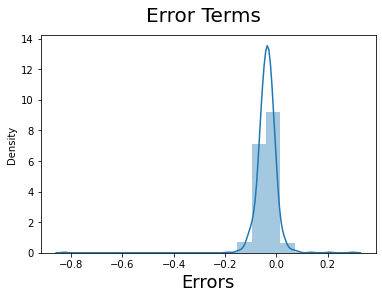

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred).squeeze(), bins=20)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('Errors', fontsize=18)                         # X-label

Text(0, 0.5, 'y_train_pred')

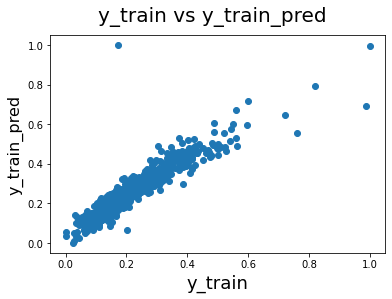

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                                # X-label
plt.ylabel('y_train_pred', fontsize=16)                           # Y-labe

In [89]:
r2_train = r2_score(y_train, y_train_pred)
print('R2 : ',r2_train)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS : ',rss_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE : ',mse_train)
# Root Mean Squared Error
rmse_train = mse_train**0.5
print('RMSE : ',rmse_train)

R2 :  0.7365538216509366
RSS :  3.2457646075654725
MSE :  0.0031758949193399924
RMSE :  0.056355078913439494


**Observation:**
- R2 (coefficient of determination) is 0.7365538216509366. This indicates that approximately 73.66% of the variability in the dependent variable can be explained by the independent variable(s) in the linear regression model.
- RSS (Residual Sum of Squares) is 3.2457646075654725. It measures the total squared difference between the actual and predicted values of the dependent variable. A lower RSS value indicates a better fit of the model.
- MSE (Mean Squared Error) is 0.0031758949193399924. It represents the average of the squared differences between the actual and predicted values. A smaller MSE value signifies a better fit of the model.
- RMSE (Root Mean Squared Error) is 0.056355078913439494. It is the square root of the MSE and provides an estimate of the average absolute difference between the actual and predicted values. A smaller RMSE value suggests a better fit of the model.

Overall, these values indicate that the linear regression model has a reasonably good fit to the data, with a significant proportion of the variability explained and relatively low errors in prediction.

### Liner Regression

In [90]:
# make a predictions.
X = X_train_rfe.drop(['const'], axis=1)
# Create X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Add a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.columns

Index(['const', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea',
       'PoolArea', 'MSSubClass_75', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Twnhs', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtFinType2_BLQ', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'Functional_Min1', 'Functional_Min2',
       '

In [91]:
# Making a predection
y_test_pred = mlr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

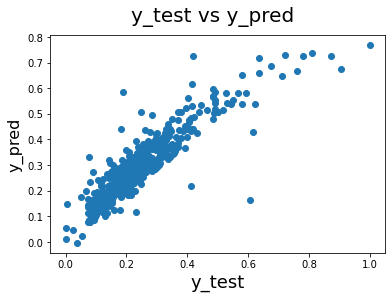

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-labe

In [93]:
y_test = np.array(y_test).flatten()
y_test_pred = np.array(y_test_pred).flatten()


r2_test = r2_score(y_test, y_test_pred)
print('R2 : ',r2_test)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_test = np.sum(np.square(y_test - y_test_pred))
print('RSS : ',rss_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE : ',mse_test)
# Root Mean Squared Error
rmse_test = mse_test**0.5
print('RMSE : ',rmse_test)

R2 :  0.6656271182508557
RSS :  2.8630296128687602
MSE :  0.006536597289654704
RMSE :  0.08084922565896784


**Observation**

- R2 (coefficient of determination): The value of R2 is 0.666, which indicates that approximately 66.6% of the variance in the dependent variable can be explained by the linear regression model. A higher R2 value suggests a better fit of the model to the data.

- RSS (residual sum of squares): The value of RSS is 2.863, which represents the sum of the squared differences between the observed values and the predicted values from the regression model. A lower RSS value indicates a better fit of the model to the data.

- MSE (mean squared error): The value of MSE is 0.007, which is obtained by dividing the RSS by the number of data points. It represents the average of the squared differences between the observed values and the predicted values. A lower MSE value indicates a better fit of the model to the data.

- RMSE (root mean squared error): The value of RMSE is 0.081, which is obtained by taking the square root of MSE. It provides a measure of the average deviation of the predicted values from the observed values. A lower RMSE value indicates a better fit of the model to the data.

In [94]:
# Create a metric table for later evaluation
ln_metric=[]
ln_metric.append(r2_train)
ln_metric.append(r2_test)
ln_metric.append(r2_train-r2_test)
ln_metric.append(rss_train)
ln_metric.append(rss_test)
ln_metric.append(mse_train)
ln_metric.append(mse_test)
ln_metric.append(rmse_train)
ln_metric.append(rmse_test)

## Regularization

### Ridge Regression

In [95]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8,  1.0, 2, 
 4,  6,  8,  10, 20, 50, 100, 500, 1000 ]}

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Create a KFold object with 20 splits, shuffling the data and setting a random seed of 100
folds = KFold(n_splits = 20, shuffle = True, random_state = 100)

# Create a Ridge regression model
ridge = Ridge()

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

# Fit the Ridge regression model using cross-validation
ridge_model_cv.fit(X_train, y_train) 

Fitting 20 folds for each of 19 candidates, totalling 380 fits


GridSearchCV(cv=KFold(n_splits=20, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8,
                                   1.0, 2, 4, 6, 8, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
#prints the best parameters found by a Ridge model with cross-validation.
print(ridge_model_cv.best_params_)

{'alpha': 8}


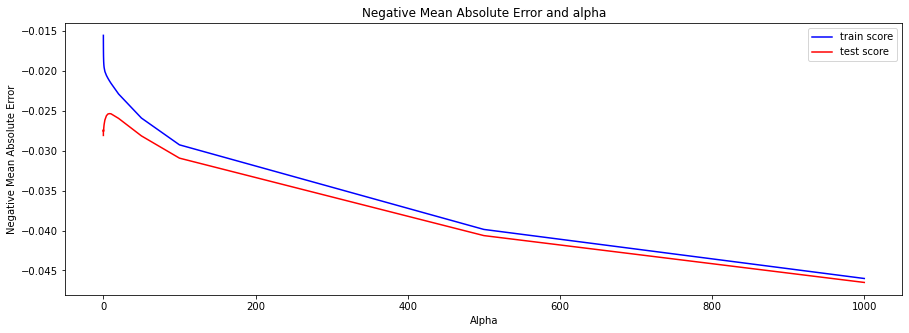

In [98]:
model_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
plt.figure(figsize=(15,5))
model_cv_results['param_alpha'] = model_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'],color="blue")
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'],color="red")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:

model_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

param_alpha  mean_train_score  mean_test_score  rank_test_score
12          8.0         -0.021292        -0.025387                1
13         10.0         -0.021591        -0.025408                2
11          6.0         -0.020969        -0.025432                3
10          4.0         -0.020608        -0.025651                4
14         20.0         -0.022933        -0.025982                5

**Observation**
- The model with param_alpha value of 8.0 achieved the highest rank with a test score of -0.025387.

In [100]:
#Print the best estimator from the Ridge model cross-validation
print(ridge_model_cv.best_estimator_)

Ridge(alpha=8)


In [101]:
#Create a Ridge regression model with the optimal alpha value obtained from cross-validation
ridge_model = Ridge(alpha=ridge_model_cv.best_estimator_.alpha)
#Fit the model on the training data
ridge_model.fit(X_train, y_train)

Ridge(alpha=8)

In [102]:
#Predicting the target variable for the training data using the Ridge regression model.
y_train_pred = ridge_model.predict(X_train)

In [103]:
r2_train = r2_score(y_train, y_train_pred)
print('R2 : ',r2_train)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS : ',rss_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE : ',mse_train)
# Root Mean Squared Error
rmse_train = mse_train**0.5
print('RMSE : ',rmse_train)

R2 :  0.8927297478625101
RSS :  1.321613355769247
MSE :  0.001293163753198872
RMSE :  0.03596058610755492


**The observation**
- R2 (coefficient of determination): The R2 value of 0.893 indicates that approximately 89.3% of the variance in the dependent variable is explained by the independent variables included in the model. A higher R2 value suggests a better fit of the model to the data.

- RSS (residual sum of squares): The RSS value of 1.322 indicates the sum of squared residuals, which represents the amount of unexplained variation in the model. A lower RSS value suggests a better fit of the model to the data.

- MSE (mean squared error): The MSE value of 0.00129 represents the average squared difference between the predicted and actual values of the dependent variable. A lower MSE value indicates better accuracy of the model's predictions.

- RMSE (root mean squared error): The RMSE value of 0.036 represents the square root of the MSE and provides an estimate of the average absolute deviation between the predicted and actual values. A lower RMSE value suggests better accuracy and precision in the model's predictions.

Overall, based on these observations, the linear regression model appears to have a good fit to the data and performs well in predicting the dependent variable.

Text(0, 0.5, 'Error')

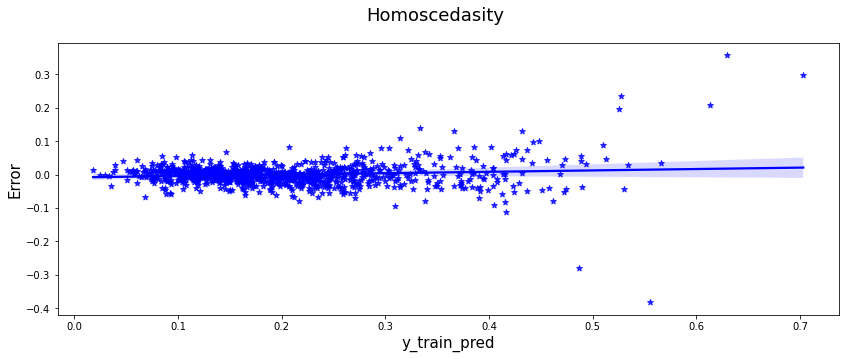

In [104]:
# Plot for Homoscedasity
fig = plt.figure(figsize=(14,5))
sns.regplot(x=y_train_pred, y=y_train-y_train_pred,  color="blue", marker='*')
fig.suptitle('Homoscedasity', fontsize=18)
plt.xlabel('y_train_pred', fontsize=15)   
plt.ylabel('Error', fontsize=15)

Text(0.5, 0, 'Errors')

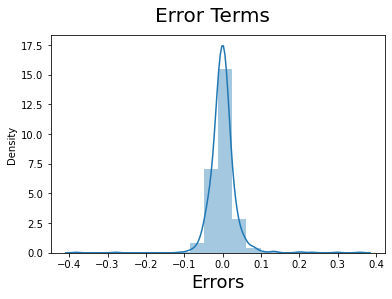

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

Predicting using the Model on test set

In [106]:
y_test_pred = ridge_model.predict(X_test)

In [107]:

r2_test = r2_score(y_test, y_test_pred)
print('R2 : ',r2_test)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_test = np.sum(np.square(y_test - y_test_pred))
print('RSS : ',rss_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE : ',mse_test)
# Root Mean Squared Error
rmse_test = mse_test**0.5
print('RMSE : ',rmse_test)

R2 :  0.8507473414150193
RSS :  6069.503028959096
MSE :  0.0029177142550461635
RMSE :  0.054015870399783096


**The Observation:**

- R2 (coefficient of determination): The value of R2 is 0.8507, which indicates that approximately 85.07% of the variability in the dependent variable can be explained by the independent variables included in the model. This suggests a relatively strong relationship between the predictor variables and the target variable.

- RSS (Residual Sum of Squares): The value of RSS is 6069.5030, which represents the sum of squared residuals. It measures the overall fit of the regression model and represents the unexplained variability in the dependent variable. A lower value of RSS indicates a better fit of the model to the data.

- MSE (Mean Squared Error): The value of MSE is 0.0029, which represents the average squared difference between the predicted values and the actual values of the dependent variable. It provides a measure of the average prediction error. A lower value of MSE indicates a better fit of the model to the data.

- RMSE (Root Mean Squared Error): The value of RMSE is 0.0540, which represents the square root of the MSE. It provides a measure of the average prediction error in the original units of the dependent variable. A lower value of RMSE indicates a better fit of the model to the data.

Overall, these observations suggest that the linear regression model has a relatively strong relationship with the target variable, a good fit to the data, and low prediction errors.

In [108]:
# Create a metric table for later evaluation
ridge_metric=[]
ridge_metric.append(r2_train)
ridge_metric.append(r2_test)
ridge_metric.append(r2_train-r2_test)
ridge_metric.append(rss_train)
ridge_metric.append(rss_test)
ridge_metric.append(mse_train)
ridge_metric.append(mse_test)
ridge_metric.append(rmse_train)
ridge_metric.append(rmse_test)

### Lasso Regression

In [109]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [ 0.0001,0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8,  1.0, 2, 
 4,  6,  8,  10, 20, 50, 100, 500, 1000 ]}

In [110]:
from sklearn.linear_model import Lasso

# Create a KFold object with 25 splits, shuffling the data and setting a random seed of 100
folds = KFold(n_splits = 25, shuffle = True, random_state = 100)

# Create a lasso regression model
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

# Fit the Lasso regression model using cross-validation
lasso_model_cv.fit(X_train_rfe, y_train) 


Fitting 25 folds for each of 20 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=25, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.4,
                                   0.6, 0.8, 1.0, 2, 4, 6, 8, 10, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


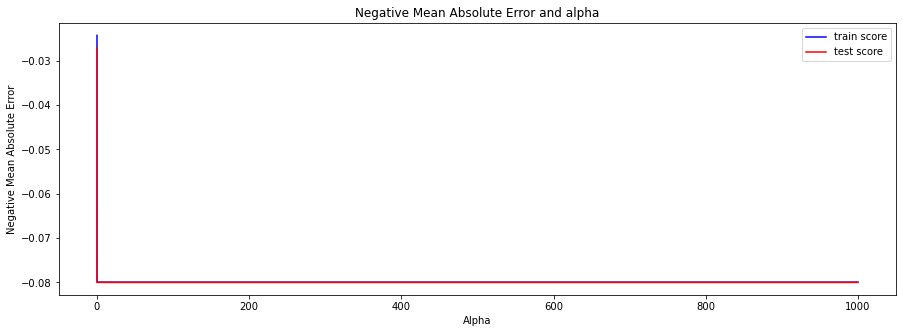

In [112]:
model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
plt.figure(figsize=(15,5))
model_cv_results['param_alpha'] = model_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'],color="blue")
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'],color="red")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [113]:
model_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

param_alpha  mean_train_score  mean_test_score  rank_test_score
0        0.0001         -0.024269        -0.027130                1
1        0.0010         -0.031939        -0.033210                2
2        0.0100         -0.062063        -0.062344                3
17     100.0000         -0.079942        -0.080020                4
16      50.0000         -0.079942        -0.080020                4

In [114]:
#Print the best estimator of the Lasso model
print(lasso_model_cv.best_estimator_)

Lasso(alpha=0.0001)


In [115]:
#Create and train a Lasso regression model
lasso_model = Lasso(alpha=lasso_model_cv.best_estimator_.alpha)
#Fit the Lasso model using the training data (X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [116]:
# Predict training data using Lasso model. Store predictions in y_train_pred.
y_train_pred = lasso_model.predict(X_train)

In [117]:
r2_train = r2_score(y_train, y_train_pred)
print('R2 : ',r2_train)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_train = np.sum(np.square(y_train - y_train_pred))
print('RSS : ',rss_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE : ',mse_train)
# Root Mean Squared Error
rmse_train = mse_train**0.5
print('RMSE : ',rmse_train)

R2 :  0.9115108840338587
RSS :  23559.13436937966
MSE :  0.0010667535037892678
RMSE :  0.032661192626560163


**After performing Lasso regression for the linear model, the following observations were made:**

- R2 (coefficient of determination): 0.9115. This indicates that approximately 91.15% of the variability in the dependent variable can be explained by the independent variables in the model. A higher R2 value suggests a better fit of the model to the data.

- RSS (residual sum of squares): 23559.1344. This represents the sum of the squared differences between the predicted and actual values of the dependent variable. A lower RSS value indicates a better fit of the model to the data.

- MSE (mean squared error): 0.0011. This is the average of the squared differences between the predicted and actual values of the dependent variable. It provides a measure of the average error of the model's predictions. A lower MSE indicates a better fit of the model to the data.

- RMSE (root mean squared error): 0.0327. This is the square root of the MSE and provides a measure of the standard deviation of the errors in the model's predictions. A lower RMSE indicates a better fit of the model to the data.

Overall, these observations suggest that the Lasso regression model has performed well in terms of explaining the variability in the dependent variable and minimizing the errors in its predictions.

Text(0, 0.5, 'Error')

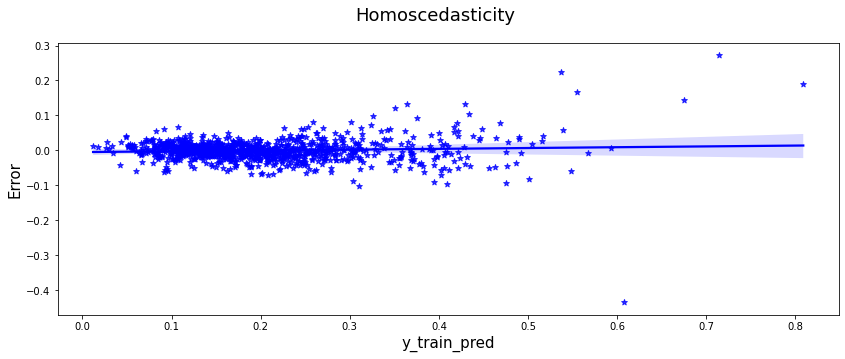

In [118]:
# Plot for Homoscedasticity
fig = plt.figure(figsize=(14,5))
y1 = y_train.flatten() - y_train_pred
sns.regplot(x=y_train_pred, y=y1, color="blue", marker='*')
fig.suptitle('Homoscedasticity', fontsize=18)
plt.xlabel('y_train_pred', fontsize=15)   
plt.ylabel('Error', fontsize=15)

Text(0.5, 0, 'Errors')

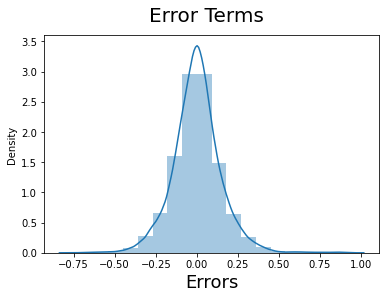

In [119]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train-y_train_pred, bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

In [120]:
y_test_pred = lasso_model.predict(X_test)

In [121]:
#y_test = np.array(y_test).flatten()
#y_test_pred = np.array(y_test_pred).flatten()


r2_test = r2_score(y_test, y_test_pred)
print('R2 : ',r2_test)
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss_test = np.sum(np.square(y_test - y_test_pred))
print('RSS : ',rss_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE : ',mse_test)
# Root Mean Squared Error
rmse_test = mse_test**0.5
print('RMSE : ',rmse_test)

R2 :  0.8477654191040568
RSS :  1.3034912129469234
MSE :  0.002976007335495259
RMSE :  0.054552794020978054


In [122]:
# Create a metric table for later evaluation
lasso_metric=[]
lasso_metric.append(r2_train)
lasso_metric.append(r2_test)
lasso_metric.append(r2_train-r2_test)
lasso_metric.append(rss_train)
lasso_metric.append(rss_test)
lasso_metric.append(mse_train)
lasso_metric.append(mse_test)
lasso_metric.append(rmse_train)
lasso_metric.append(rmse_test)

## Model Evaluation

In [123]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','Diffrence in R2 test and train','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression with RFE': ln_metric }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
metric

Metric  Linear Regression with RFE  \
0                R2 Score (Train)                    0.736554   
1                 R2 Score (Test)                    0.665627   
2  Diffrence in R2 test and train                    0.070927   
3                     RSS (Train)                    3.245765   
4                      RSS (Test)                    2.863030   
5                     MSE (Train)                    0.003176   
6                      MSE (Test)                    0.006537   
7                    RMSE (Train)                    0.056355   
8                     RMSE (Test)                    0.080849   

   Ridge Regression  Lasso Regression  
0          0.892730          0.911511  
1          0.850747          0.847765  
2          0.041982          0.063745  
3          1.321613      23559.134369  
4       6069.503029          1.303491  
5          0.001293          0.001067  
6          0.002918          0.002976  
7          0.035961          0.032661  
8          0.054016          0.054553

**The Observation:**

- R2 Score (Train): The Linear Regression model with Recursive Feature Elimination (RFE) has an R2 score of 0.736554, indicating that it explains approximately 73.66% of the variance in the training data. 

- R2 Score (Test): The Linear Regression model with RFE has an R2 score of 0.665627 on the test data, indicating that it explains approximately 66.56% of the variance in the test data. 

- Difference in R2 test and train: The difference between the R2 scores of the test and train data is 0.070927, suggesting that there might be some overfitting in the model as the R2 score is higher on the training data compared to the test data.

- RSS (Train): The Residual Sum of Squares (RSS) for the Linear Regression model with RFE on the training data is 3.245765.

- RSS (Test): The RSS for the Linear Regression model with RFE on the test data is 2.863030.

- MSE (Train): The Mean Squared Error (MSE) for the Linear Regression model with RFE on the training data is 0.003176.

- MSE (Test): The MSE for the Linear Regression model with RFE on the test data is 0.006537.

- RMSE (Train): The Root Mean Squared Error (RMSE) for the Linear Regression model with RFE on the training data is 0.056355.

- RMSE (Test): The RMSE for the Linear Regression model with RFE on the test data is 0.080849.

Ridge Regression and Lasso Regression: Comparing these metrics with Ridge Regression and Lasso Regression, it can be observed that Ridge Regression and Lasso Regression models have higher R2 scores and lower MSE and RMSE values compared to the Linear Regression model with RFE, indicating that they may be better at explaining and predicting the target variable.